In [2]:
pip install snscrape

  Using cached snscrape-0.4.3.20220106-py3-none-any.whl (59 kB)
Note: you may need to restart the kernel to use updated packages.


In [185]:
pip install Pyppeteer

     -------------------------------------- 83.4/83.4 kB 391.1 kB/s eta 0:00:00
     ------------------------------------ 101.4/101.4 kB 970.2 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [1]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from wordcloud import WordCloud
from nltk.tokenize import TweetTokenizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


#for text pre-processing
import re, string  #Regular expression
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#for word embedding
import gensim
from gensim.models import Word2Vec #Word2Vec is mostly used for huge datasets

[nltk_data] Downloading package punkt to C:\Users\Vinayak
[nltk_data]     Mokashi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Vinayak Mokashi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to C:\Users\Vinayak
[nltk_data]     Mokashi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Creating list to append tweet data to
attributes_container1 = []
# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('#eknathshinde since:2022-07-01 until:2022-11-15').get_items()):
    if i>50000:
        break
    attributes_container1.append([tweet.likeCount,tweet.retweetCount,tweet.user.username, tweet.date, tweet.content])
# Creating a dataframe to load the list
tweets_df1 = pd.DataFrame(attributes_container1, columns=["Like_Count", "Retweet_Count", "Username", "Date", "Tweet"])

In [3]:
print(tweets_df1)

       Like_Count  Retweet_Count         Username                      Date  \
0              47              2           lokmat 2022-11-14 22:20:38+00:00   
1               3              0        shreyad21 2022-11-14 20:54:01+00:00   
2               0              0  insightnewstory 2022-11-14 20:15:06+00:00   
3               0              0     News18lokmat 2022-11-14 19:28:05+00:00   
4               3              0       mataonline 2022-11-14 19:05:21+00:00   
...           ...            ...              ...                       ...   
49996          23              9        mumbaitak 2022-07-10 07:50:58+00:00   
49997          24              1       TV9Marathi 2022-07-10 07:50:00+00:00   
49998           0              0    INFirstAlways 2022-07-10 07:49:41+00:00   
49999           2              0  sharmagandharvv 2022-07-10 07:36:10+00:00   
50000           2              0  LatestLYMarathi 2022-07-10 07:34:06+00:00   

                                                   

In [4]:
tweets_df1.to_csv('Eknath_RawTweets.csv', encoding = 'utf-8')

In [5]:
# Creating list to append tweet data to
attributes_container2 = []
# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('#UddhavThackeray since:2022-07-01 until:2022-11-15').get_items()):
    if i>50000:
        break
    attributes_container2.append([tweet.likeCount,tweet.retweetCount,tweet.user.username, tweet.date, tweet.content])
# Creating a dataframe to load the list
tweets_df2 = pd.DataFrame(attributes_container2, columns=["Like_Count", "Retweet_Count", "Username", "Date", "Tweet"])

In [6]:
print(tweets_df2)

       Like_Count  Retweet_Count         Username                      Date  \
0               3              0         jeetvira 2022-11-14 21:19:11+00:00   
1               0              0  insightnewstory 2022-11-14 20:15:06+00:00   
2               3              0       mataonline 2022-11-14 19:05:21+00:00   
3               1              0     News18lokmat 2022-11-14 18:43:51+00:00   
4               8              0     News18lokmat 2022-11-14 18:40:53+00:00   
...           ...            ...              ...                       ...   
49109          10              2        firstpost 2022-07-01 00:44:17+00:00   
49110           1              0  SharadS95284221 2022-07-01 00:43:39+00:00   
49111           5              2  DrAlpnaKulshre1 2022-07-01 00:22:42+00:00   
49112           0              0     iVimalPandey 2022-07-01 00:14:19+00:00   
49113           0              0        Ashok2103 2022-07-01 00:11:35+00:00   

                                                   

In [7]:
tweets_df2.to_csv('Uddhav_RawTweets.csv', encoding = 'utf-8')

#### Baar baar data load nahi karna isliye csv mai daalke rakha tha abhi vahi se karunga import

In [2]:
tweets_df1 = pd.read_csv('Eknath_RawTweets.csv')

In [3]:
tweets_df2 = pd.read_csv('Uddhav_RawTweets.csv')

In [4]:
tweets_df1

Like_Count  Retweet_Count         Username                       Date  \
0              47              2           lokmat  2022-11-14 22:20:38+00:00   
1               3              0        shreyad21  2022-11-14 20:54:01+00:00   
2               0              0  insightnewstory  2022-11-14 20:15:06+00:00   
3               0              0     News18lokmat  2022-11-14 19:28:05+00:00   
4               3              0       mataonline  2022-11-14 19:05:21+00:00   
...           ...            ...              ...                        ...   
49996          23              9        mumbaitak  2022-07-10 07:50:58+00:00   
49997          24              1       TV9Marathi  2022-07-10 07:50:00+00:00   
49998           0              0    INFirstAlways  2022-07-10 07:49:41+00:00   
49999           2              0  sharmagandharvv  2022-07-10 07:36:10+00:00   
50000           2              0  LatestLYMarathi  2022-07-10 07:34:06+00:00   

                                                   Tweet  
0      "मुख्यमंत्री माझे जुने मित्र; मला संशयही नव्हत...  
1      ठाणे के किसान नगर में शिंदे गुट और ठाकरे गुट क...  
2      ठाकरे – शिंदे गुट में जबरजस्त फाइट\nएक दूसरे प...  
3      विनयभंगाच्या आरोपानंतर जितेंद्र आव्हाडांचा राज...  
4      संघर्ष थांबेना, ठाण्यात ठाकरे शिंदे समर्थक पुन...  
...                                                  ...  
49996  विधानसभा उपाध्यक्ष नरहरी झिरवळ यांनी सांगितलं,...  
49997  Eknath Shinde : निधीची कमी नाही वारकऱ्यांची से...  
49998  So #EknathShinde confirms Achhe Din aaye nahi ...  
49999  Seems #EknathShinde has really grown out to be...  
50000  Eknath Shinde Pattern in Goa Congress: गोवा का...  

[50001 rows x 5 columns]

In [5]:
tweets_df2

Like_Count  Retweet_Count         Username                       Date  \
0               3              0         jeetvira  2022-11-14 21:19:11+00:00   
1               0              0  insightnewstory  2022-11-14 20:15:06+00:00   
2               3              0       mataonline  2022-11-14 19:05:21+00:00   
3               1              0     News18lokmat  2022-11-14 18:43:51+00:00   
4               8              0     News18lokmat  2022-11-14 18:40:53+00:00   
...           ...            ...              ...                        ...   
49109          10              2        firstpost  2022-07-01 00:44:17+00:00   
49110           1              0  SharadS95284221  2022-07-01 00:43:39+00:00   
49111           5              2  DrAlpnaKulshre1  2022-07-01 00:22:42+00:00   
49112           0              0     iVimalPandey  2022-07-01 00:14:19+00:00   
49113           0              0        Ashok2103  2022-07-01 00:11:35+00:00   

                                                   Tweet  
0      शिवसेनेची धगधगती तोफ, निष्ठावंत नेते, खासदार म...  
1      ठाकरे – शिंदे गुट में जबरजस्त फाइट\nएक दूसरे प...  
2      संघर्ष थांबेना, ठाण्यात ठाकरे शिंदे समर्थक पुन...  
3      ठाण्यामध्ये पुन्हा एकदा धुमशान, ठाकरे-शिंदे गट...  
4      ठाण्यामध्ये ठाकरे-शिंदे गटात जोरदार राडा, शिंद...  
...                                                  ...  
49109  As #UddhavThackeray embarks upon rebuilding hi...  
49110  दुल्हे को घोड़ी पर बैठा कर गधा बना दिया 😂😂\nड्...  
49111  @PNRai1 #BigBreaking\n\n#EknathShinde to be th...  
49112  @Anjna116 WillB updated again, another “former...  
49113  Finally #UddhavThackeray extends best wishes t...  

[49114 rows x 5 columns]

In [6]:
print('Total number of records in Eknath dataset: ', tweets_df1.shape)
print('Total number of records in Uddhav dataset: ', tweets_df2.shape)

Total number of records in Eknath dataset:  (50001, 5)
Total number of records in Uddhav dataset:  (49114, 5)


In [7]:
tweets_df1.columns

Index(['Like_Count', 'Retweet_Count', 'Username', 'Date', 'Tweet'], dtype='object')

In [8]:
tweets_df2.columns

Index(['Like_Count', 'Retweet_Count', 'Username', 'Date', 'Tweet'], dtype='object')

In [9]:
tweets_eknath = tweets_df1.Date
tweets_uddhav = tweets_df2.Date

Date_tweets_in_common = set(tweets_df1.Date).intersection(set(tweets_df2.Date))
len(Date_tweets_in_common)

11836

In [10]:
eknath_unique_df = tweets_df1[~tweets_df1['Date'].isin(Date_tweets_in_common)]
uddhav_unique_df = tweets_df2[~tweets_df2['Date'].isin(Date_tweets_in_common)]

In [11]:
eknath_unique_df

Like_Count  Retweet_Count         Username                       Date  \
0              47              2           lokmat  2022-11-14 22:20:38+00:00   
1               3              0        shreyad21  2022-11-14 20:54:01+00:00   
3               0              0     News18lokmat  2022-11-14 19:28:05+00:00   
5               0              0     ShivleNikhil  2022-11-14 18:45:35+00:00   
8               1              1   HemantKothari3  2022-11-14 18:37:07+00:00   
...           ...            ...              ...                        ...   
49995           1              1         GaytriMT  2022-07-10 07:55:21+00:00   
49997          24              1       TV9Marathi  2022-07-10 07:50:00+00:00   
49998           0              0    INFirstAlways  2022-07-10 07:49:41+00:00   
49999           2              0  sharmagandharvv  2022-07-10 07:36:10+00:00   
50000           2              0  LatestLYMarathi  2022-07-10 07:34:06+00:00   

                                                   Tweet  
0      "मुख्यमंत्री माझे जुने मित्र; मला संशयही नव्हत...  
1      ठाणे के किसान नगर में शिंदे गुट और ठाकरे गुट क...  
3      विनयभंगाच्या आरोपानंतर जितेंद्र आव्हाडांचा राज...  
5      सरकार आलं आहे म्हणून बेन बोलत आहे काही पण त्या...  
8      It's #Awhad V/s Shrikant #shinde &amp; one thi...  
...                                                  ...  
49995  उद्धव ठाकरेंची मोठी कारवाई; तानाजी सावंतांची ज...  
49997  Eknath Shinde : निधीची कमी नाही वारकऱ्यांची से...  
49998  So #EknathShinde confirms Achhe Din aaye nahi ...  
49999  Seems #EknathShinde has really grown out to be...  
50000  Eknath Shinde Pattern in Goa Congress: गोवा का...  

[37716 rows x 5 columns]

In [12]:
eknath_unique_df.reset_index(inplace=True)

In [13]:
eknath_unique_df

index  Like_Count  Retweet_Count         Username  \
0          0          47              2           lokmat   
1          1           3              0        shreyad21   
2          3           0              0     News18lokmat   
3          5           0              0     ShivleNikhil   
4          8           1              1   HemantKothari3   
...      ...         ...            ...              ...   
37711  49995           1              1         GaytriMT   
37712  49997          24              1       TV9Marathi   
37713  49998           0              0    INFirstAlways   
37714  49999           2              0  sharmagandharvv   
37715  50000           2              0  LatestLYMarathi   

                            Date  \
0      2022-11-14 22:20:38+00:00   
1      2022-11-14 20:54:01+00:00   
2      2022-11-14 19:28:05+00:00   
3      2022-11-14 18:45:35+00:00   
4      2022-11-14 18:37:07+00:00   
...                          ...   
37711  2022-07-10 07:55:21+00:00   
37712  2022-07-10 07:50:00+00:00   
37713  2022-07-10 07:49:41+00:00   
37714  2022-07-10 07:36:10+00:00   
37715  2022-07-10 07:34:06+00:00   

                                                   Tweet  
0      "मुख्यमंत्री माझे जुने मित्र; मला संशयही नव्हत...  
1      ठाणे के किसान नगर में शिंदे गुट और ठाकरे गुट क...  
2      विनयभंगाच्या आरोपानंतर जितेंद्र आव्हाडांचा राज...  
3      सरकार आलं आहे म्हणून बेन बोलत आहे काही पण त्या...  
4      It's #Awhad V/s Shrikant #shinde &amp; one thi...  
...                                                  ...  
37711  उद्धव ठाकरेंची मोठी कारवाई; तानाजी सावंतांची ज...  
37712  Eknath Shinde : निधीची कमी नाही वारकऱ्यांची से...  
37713  So #EknathShinde confirms Achhe Din aaye nahi ...  
37714  Seems #EknathShinde has really grown out to be...  
37715  Eknath Shinde Pattern in Goa Congress: गोवा का...  

[37716 rows x 6 columns]

In [14]:
eknath_unique_df_after_drop = eknath_unique_df.drop(['index'], axis = 1)

In [15]:
eknath_unique_df_after_drop

Like_Count  Retweet_Count         Username                       Date  \
0              47              2           lokmat  2022-11-14 22:20:38+00:00   
1               3              0        shreyad21  2022-11-14 20:54:01+00:00   
2               0              0     News18lokmat  2022-11-14 19:28:05+00:00   
3               0              0     ShivleNikhil  2022-11-14 18:45:35+00:00   
4               1              1   HemantKothari3  2022-11-14 18:37:07+00:00   
...           ...            ...              ...                        ...   
37711           1              1         GaytriMT  2022-07-10 07:55:21+00:00   
37712          24              1       TV9Marathi  2022-07-10 07:50:00+00:00   
37713           0              0    INFirstAlways  2022-07-10 07:49:41+00:00   
37714           2              0  sharmagandharvv  2022-07-10 07:36:10+00:00   
37715           2              0  LatestLYMarathi  2022-07-10 07:34:06+00:00   

                                                   Tweet  
0      "मुख्यमंत्री माझे जुने मित्र; मला संशयही नव्हत...  
1      ठाणे के किसान नगर में शिंदे गुट और ठाकरे गुट क...  
2      विनयभंगाच्या आरोपानंतर जितेंद्र आव्हाडांचा राज...  
3      सरकार आलं आहे म्हणून बेन बोलत आहे काही पण त्या...  
4      It's #Awhad V/s Shrikant #shinde &amp; one thi...  
...                                                  ...  
37711  उद्धव ठाकरेंची मोठी कारवाई; तानाजी सावंतांची ज...  
37712  Eknath Shinde : निधीची कमी नाही वारकऱ्यांची से...  
37713  So #EknathShinde confirms Achhe Din aaye nahi ...  
37714  Seems #EknathShinde has really grown out to be...  
37715  Eknath Shinde Pattern in Goa Congress: गोवा का...  

[37716 rows x 5 columns]

In [16]:
uddhav_unique_df

Like_Count  Retweet_Count         Username                       Date  \
0               3              0         jeetvira  2022-11-14 21:19:11+00:00   
5               0              0     SoyraMaratha  2022-11-14 18:39:59+00:00   
8               0              0       Freehindus  2022-11-14 18:06:09+00:00   
10              1              0      lawanyashil  2022-11-14 17:20:17+00:00   
11              6              1    AmarUjalaNews  2022-11-14 17:20:00+00:00   
...           ...            ...              ...                        ...   
49109          10              2        firstpost  2022-07-01 00:44:17+00:00   
49110           1              0  SharadS95284221  2022-07-01 00:43:39+00:00   
49111           5              2  DrAlpnaKulshre1  2022-07-01 00:22:42+00:00   
49112           0              0     iVimalPandey  2022-07-01 00:14:19+00:00   
49113           0              0        Ashok2103  2022-07-01 00:11:35+00:00   

                                                   Tweet  
0      शिवसेनेची धगधगती तोफ, निष्ठावंत नेते, खासदार म...  
5      #Politician #HappyBirthday#sanjayraut #shivsen...  
8      #UddhavThackarey\n#uddhavThackeray\n#ShivSena\...  
10     असंविधानिक खोके सरकारचा निसबेध 🏴\n\n#Shivsena ...  
11     Maharashtra Politics: तीरकमान मुद्दे पर हाईकोर...  
...                                                  ...  
49109  As #UddhavThackeray embarks upon rebuilding hi...  
49110  दुल्हे को घोड़ी पर बैठा कर गधा बना दिया 😂😂\nड्...  
49111  @PNRai1 #BigBreaking\n\n#EknathShinde to be th...  
49112  @Anjna116 WillB updated again, another “former...  
49113  Finally #UddhavThackeray extends best wishes t...  

[36811 rows x 5 columns]

In [17]:
uddhav_unique_df.reset_index(inplace=True)

In [18]:
uddhav_unique_df

index  Like_Count  Retweet_Count         Username  \
0          0           3              0         jeetvira   
1          5           0              0     SoyraMaratha   
2          8           0              0       Freehindus   
3         10           1              0      lawanyashil   
4         11           6              1    AmarUjalaNews   
...      ...         ...            ...              ...   
36806  49109          10              2        firstpost   
36807  49110           1              0  SharadS95284221   
36808  49111           5              2  DrAlpnaKulshre1   
36809  49112           0              0     iVimalPandey   
36810  49113           0              0        Ashok2103   

                            Date  \
0      2022-11-14 21:19:11+00:00   
1      2022-11-14 18:39:59+00:00   
2      2022-11-14 18:06:09+00:00   
3      2022-11-14 17:20:17+00:00   
4      2022-11-14 17:20:00+00:00   
...                          ...   
36806  2022-07-01 00:44:17+00:00   
36807  2022-07-01 00:43:39+00:00   
36808  2022-07-01 00:22:42+00:00   
36809  2022-07-01 00:14:19+00:00   
36810  2022-07-01 00:11:35+00:00   

                                                   Tweet  
0      शिवसेनेची धगधगती तोफ, निष्ठावंत नेते, खासदार म...  
1      #Politician #HappyBirthday#sanjayraut #shivsen...  
2      #UddhavThackarey\n#uddhavThackeray\n#ShivSena\...  
3      असंविधानिक खोके सरकारचा निसबेध 🏴\n\n#Shivsena ...  
4      Maharashtra Politics: तीरकमान मुद्दे पर हाईकोर...  
...                                                  ...  
36806  As #UddhavThackeray embarks upon rebuilding hi...  
36807  दुल्हे को घोड़ी पर बैठा कर गधा बना दिया 😂😂\nड्...  
36808  @PNRai1 #BigBreaking\n\n#EknathShinde to be th...  
36809  @Anjna116 WillB updated again, another “former...  
36810  Finally #UddhavThackeray extends best wishes t...  

[36811 rows x 6 columns]

In [19]:
uddhav_unique_df_after_drop = uddhav_unique_df.drop(['index'], axis = 1)

In [20]:
uddhav_unique_df_after_drop

Like_Count  Retweet_Count         Username                       Date  \
0               3              0         jeetvira  2022-11-14 21:19:11+00:00   
1               0              0     SoyraMaratha  2022-11-14 18:39:59+00:00   
2               0              0       Freehindus  2022-11-14 18:06:09+00:00   
3               1              0      lawanyashil  2022-11-14 17:20:17+00:00   
4               6              1    AmarUjalaNews  2022-11-14 17:20:00+00:00   
...           ...            ...              ...                        ...   
36806          10              2        firstpost  2022-07-01 00:44:17+00:00   
36807           1              0  SharadS95284221  2022-07-01 00:43:39+00:00   
36808           5              2  DrAlpnaKulshre1  2022-07-01 00:22:42+00:00   
36809           0              0     iVimalPandey  2022-07-01 00:14:19+00:00   
36810           0              0        Ashok2103  2022-07-01 00:11:35+00:00   

                                                   Tweet  
0      शिवसेनेची धगधगती तोफ, निष्ठावंत नेते, खासदार म...  
1      #Politician #HappyBirthday#sanjayraut #shivsen...  
2      #UddhavThackarey\n#uddhavThackeray\n#ShivSena\...  
3      असंविधानिक खोके सरकारचा निसबेध 🏴\n\n#Shivsena ...  
4      Maharashtra Politics: तीरकमान मुद्दे पर हाईकोर...  
...                                                  ...  
36806  As #UddhavThackeray embarks upon rebuilding hi...  
36807  दुल्हे को घोड़ी पर बैठा कर गधा बना दिया 😂😂\nड्...  
36808  @PNRai1 #BigBreaking\n\n#EknathShinde to be th...  
36809  @Anjna116 WillB updated again, another “former...  
36810  Finally #UddhavThackeray extends best wishes t...  

[36811 rows x 5 columns]

In [27]:
!pip install langdetect

     -------------------------------------- 981.5/981.5 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993225 sha256=79f1037572376f28bc0d040cc9e36546142ac365f18cc88e0eedab741722eb25
  Stored in directory: c:\users\vinayak mokashi\appdata\local\pip\cache\wheels\d1\c1\d9\7e068de779d863bc8f8fc9467d85e25cfe47fa5051fff1a1bb
Successfully built langdetect


In [21]:
#try out langdetect on a sample tweet
import langdetect
from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0
print(eknath_unique_df_after_drop.iloc[37714,4])
detect(eknath_unique_df_after_drop.iloc[37714,4])

Seems #EknathShinde has really grown out to be a mass leader.
The fight for #RealShivSena will be a long legal battle.
Brilliantly written by @nistula. https://t.co/wBUmddDEMy


'en'

In [22]:
from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0

def get_language(tweet):
    try:                                                          
        lang=detect(tweet)                                      
    except:                                                       
        lang='no'
        # for some tweets, detect will throw an error.
        # uncomment the line below if you want to look further into this behavior
        #print("This tweet throws an error:", tweet)  
    return lang

In [23]:
eknath_unique_df_after_drop['lang'] = eknath_unique_df_after_drop.Tweet.apply(lambda x: get_language(x))

In [24]:
eknath_unique_df_after_drop

Like_Count  Retweet_Count         Username                       Date  \
0              47              2           lokmat  2022-11-14 22:20:38+00:00   
1               3              0        shreyad21  2022-11-14 20:54:01+00:00   
2               0              0     News18lokmat  2022-11-14 19:28:05+00:00   
3               0              0     ShivleNikhil  2022-11-14 18:45:35+00:00   
4               1              1   HemantKothari3  2022-11-14 18:37:07+00:00   
...           ...            ...              ...                        ...   
37711           1              1         GaytriMT  2022-07-10 07:55:21+00:00   
37712          24              1       TV9Marathi  2022-07-10 07:50:00+00:00   
37713           0              0    INFirstAlways  2022-07-10 07:49:41+00:00   
37714           2              0  sharmagandharvv  2022-07-10 07:36:10+00:00   
37715           2              0  LatestLYMarathi  2022-07-10 07:34:06+00:00   

                                                   Tweet lang  
0      "मुख्यमंत्री माझे जुने मित्र; मला संशयही नव्हत...   mr  
1      ठाणे के किसान नगर में शिंदे गुट और ठाकरे गुट क...   hi  
2      विनयभंगाच्या आरोपानंतर जितेंद्र आव्हाडांचा राज...   mr  
3      सरकार आलं आहे म्हणून बेन बोलत आहे काही पण त्या...   mr  
4      It's #Awhad V/s Shrikant #shinde &amp; one thi...   en  
...                                                  ...  ...  
37711  उद्धव ठाकरेंची मोठी कारवाई; तानाजी सावंतांची ज...   mr  
37712  Eknath Shinde : निधीची कमी नाही वारकऱ्यांची से...   mr  
37713  So #EknathShinde confirms Achhe Din aaye nahi ...   en  
37714  Seems #EknathShinde has really grown out to be...   en  
37715  Eknath Shinde Pattern in Goa Congress: गोवा का...   mr  

[37716 rows x 6 columns]

In [25]:
uddhav_unique_df_after_drop['lang'] = uddhav_unique_df_after_drop.Tweet.apply(lambda x: get_language(x))

In [26]:
uddhav_unique_df_after_drop

Like_Count  Retweet_Count         Username                       Date  \
0               3              0         jeetvira  2022-11-14 21:19:11+00:00   
1               0              0     SoyraMaratha  2022-11-14 18:39:59+00:00   
2               0              0       Freehindus  2022-11-14 18:06:09+00:00   
3               1              0      lawanyashil  2022-11-14 17:20:17+00:00   
4               6              1    AmarUjalaNews  2022-11-14 17:20:00+00:00   
...           ...            ...              ...                        ...   
36806          10              2        firstpost  2022-07-01 00:44:17+00:00   
36807           1              0  SharadS95284221  2022-07-01 00:43:39+00:00   
36808           5              2  DrAlpnaKulshre1  2022-07-01 00:22:42+00:00   
36809           0              0     iVimalPandey  2022-07-01 00:14:19+00:00   
36810           0              0        Ashok2103  2022-07-01 00:11:35+00:00   

                                                   Tweet lang  
0      शिवसेनेची धगधगती तोफ, निष्ठावंत नेते, खासदार म...   mr  
1      #Politician #HappyBirthday#sanjayraut #shivsen...   mr  
2      #UddhavThackarey\n#uddhavThackeray\n#ShivSena\...   en  
3      असंविधानिक खोके सरकारचा निसबेध 🏴\n\n#Shivsena ...   so  
4      Maharashtra Politics: तीरकमान मुद्दे पर हाईकोर...   hi  
...                                                  ...  ...  
36806  As #UddhavThackeray embarks upon rebuilding hi...   en  
36807  दुल्हे को घोड़ी पर बैठा कर गधा बना दिया 😂😂\nड्...   id  
36808  @PNRai1 #BigBreaking\n\n#EknathShinde to be th...   en  
36809  @Anjna116 WillB updated again, another “former...   en  
36810  Finally #UddhavThackeray extends best wishes t...   en  

[36811 rows x 6 columns]

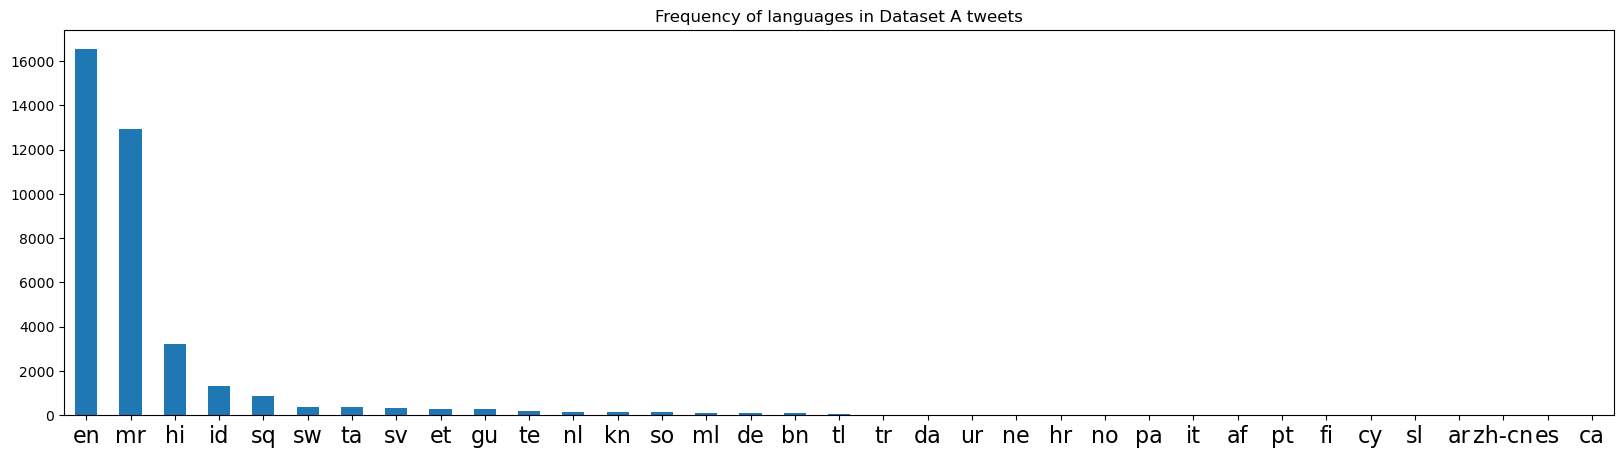

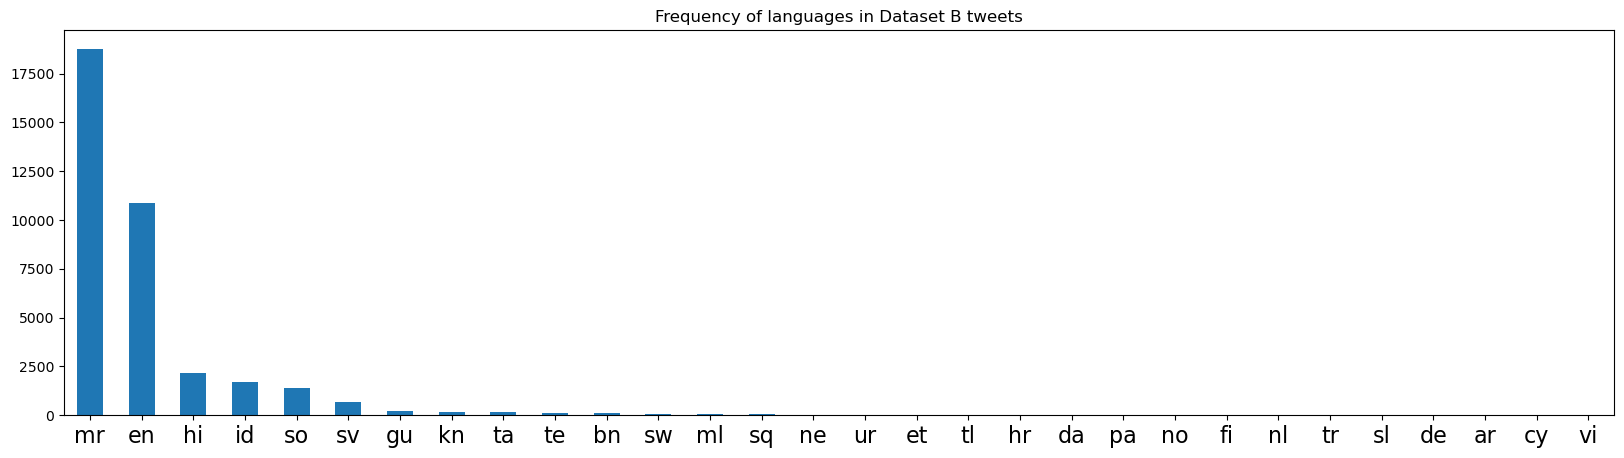

In [27]:
plt.figure(figsize=(20,5))
ax = eknath_unique_df_after_drop.lang.value_counts().plot.bar(rot=0)
plt.setp(ax.get_xticklabels(), fontsize=16)
plt.title('Frequency of languages in Dataset A tweets')
plt.show()

plt.figure(figsize=(20,5))
ax = uddhav_unique_df_after_drop.lang.value_counts().plot.bar(rot=0)
plt.setp(ax.get_xticklabels(), fontsize=16)
plt.title('Frequency of languages in Dataset B tweets')
plt.show()

In [28]:
eknath_df = eknath_unique_df_after_drop.copy()
uddhav_df = uddhav_unique_df_after_drop.copy()

In [29]:
eknath_df = eknath_df[eknath_df.lang == 'en']
uddhav_df = uddhav_df[uddhav_df.lang == 'en']

In [30]:
print('Total number of records in Eknath dataset: ', eknath_df.shape)
print('Total number of records in Uddhav dataset: ', uddhav_df.shape)

Total number of records in Eknath dataset:  (16569, 6)
Total number of records in Uddhav dataset:  (10878, 6)


In [51]:
eknath_df.to_csv('Eknath_BeforeTextPreprocessing1.csv', encoding = 'utf-8')

In [52]:
uddhav_df.to_csv('Uddhav_BeforeTextPreprocessing.csv', encoding = 'utf-8')

In [31]:
eknath_df.reset_index(inplace = True)

In [32]:
uddhav_df.reset_index(inplace = True)

In [33]:
eknath_df

index  Like_Count  Retweet_Count         Username  \
0          4           1              1   HemantKothari3   
1          9           0              0   ParisShivkumar   
2         10           0              0   ParisShivkumar   
3         13           2              0    NtnitinSodaye   
4         20           0              1     BhurateVinay   
...      ...         ...            ...              ...   
16564  37702          56              2        TOIMumbai   
16565  37705           0              0    theindianwire   
16566  37708           0              1          mid_day   
16567  37713           0              0    INFirstAlways   
16568  37714           2              0  sharmagandharvv   

                            Date  \
0      2022-11-14 18:37:07+00:00   
1      2022-11-14 18:14:20+00:00   
2      2022-11-14 18:11:37+00:00   
3      2022-11-14 17:57:40+00:00   
4      2022-11-14 16:23:48+00:00   
...                          ...   
16564  2022-07-10 08:27:56+00:00   
16565  2022-07-10 08:20:17+00:00   
16566  2022-07-10 08:00:08+00:00   
16567  2022-07-10 07:49:41+00:00   
16568  2022-07-10 07:36:10+00:00   

                                                   Tweet lang  
0      It's #Awhad V/s Shrikant #shinde &amp; one thi...   en  
1      Sule, Pawar, Patil, and Marathi media was sile...   en  
2      Jitendra has good memory loss. He forgot last ...   en  
3      #Rajthakre #EknathShinde #udhavthakre #adityat...   en  
4      @Awhadspeaks #DevendraFadnavis #EknathShinde  ...   en  
...                                                  ...  ...  
16564  #AshadiEkadashi | CM @mieknathshinde performed...   en  
16565  Maharashtra's Chief Minister, Eknath Shinde ar...   en  
16566  Maha CM rejects Uddhav’s demand for mid-term A...   en  
16567  So #EknathShinde confirms Achhe Din aaye nahi ...   en  
16568  Seems #EknathShinde has really grown out to be...   en  

[16569 rows x 7 columns]

In [34]:
uddhav_df

index  Like_Count  Retweet_Count         Username  \
0          2           0              0       Freehindus   
1          5           0              0      newslyindia   
2          6           2              1       Shivsmithh   
3         16           5              2       kvtpotadar   
4         29           2              0   jagruti_shelke   
...      ...         ...            ...              ...   
10873  36805           1              0    SatheCreation   
10874  36806          10              2        firstpost   
10875  36808           5              2  DrAlpnaKulshre1   
10876  36809           0              0     iVimalPandey   
10877  36810           0              0        Ashok2103   

                            Date  \
0      2022-11-14 18:06:09+00:00   
1      2022-11-14 16:38:53+00:00   
2      2022-11-14 16:21:08+00:00   
3      2022-11-14 12:27:39+00:00   
4      2022-11-14 11:36:34+00:00   
...                          ...   
10873  2022-07-01 00:50:43+00:00   
10874  2022-07-01 00:44:17+00:00   
10875  2022-07-01 00:22:42+00:00   
10876  2022-07-01 00:14:19+00:00   
10877  2022-07-01 00:11:35+00:00   

                                                   Tweet lang  
0      #UddhavThackarey\n#uddhavThackeray\n#ShivSena\...   en  
1      कट्टर हिंदू 🚩#adityathackeray #uddhavthackeray...   en  
2      I started as a teacher after school..in Thane....   en  
3      फक्त सत्तेसाठी #लाचार \n\n#UddhavThackeray \n#...   en  
4      #uddhavThackeray \n#adityathackeray https://t....   en  
...                                                  ...  ...  
10873  A big thank you to Shri #UddhavThackeray ji fo...   en  
10874  As #UddhavThackeray embarks upon rebuilding hi...   en  
10875  @PNRai1 #BigBreaking\n\n#EknathShinde to be th...   en  
10876  @Anjna116 WillB updated again, another “former...   en  
10877  Finally #UddhavThackeray extends best wishes t...   en  

[10878 rows x 7 columns]

In [35]:
eknath_df1 = eknath_df.drop(['index'], axis = 1)

In [36]:
uddhav_df1 = uddhav_df.drop(['index'], axis = 1)

In [37]:
eknath_df1

Like_Count  Retweet_Count         Username                       Date  \
0               1              1   HemantKothari3  2022-11-14 18:37:07+00:00   
1               0              0   ParisShivkumar  2022-11-14 18:14:20+00:00   
2               0              0   ParisShivkumar  2022-11-14 18:11:37+00:00   
3               2              0    NtnitinSodaye  2022-11-14 17:57:40+00:00   
4               0              1     BhurateVinay  2022-11-14 16:23:48+00:00   
...           ...            ...              ...                        ...   
16564          56              2        TOIMumbai  2022-07-10 08:27:56+00:00   
16565           0              0    theindianwire  2022-07-10 08:20:17+00:00   
16566           0              1          mid_day  2022-07-10 08:00:08+00:00   
16567           0              0    INFirstAlways  2022-07-10 07:49:41+00:00   
16568           2              0  sharmagandharvv  2022-07-10 07:36:10+00:00   

                                                   Tweet lang  
0      It's #Awhad V/s Shrikant #shinde &amp; one thi...   en  
1      Sule, Pawar, Patil, and Marathi media was sile...   en  
2      Jitendra has good memory loss. He forgot last ...   en  
3      #Rajthakre #EknathShinde #udhavthakre #adityat...   en  
4      @Awhadspeaks #DevendraFadnavis #EknathShinde  ...   en  
...                                                  ...  ...  
16564  #AshadiEkadashi | CM @mieknathshinde performed...   en  
16565  Maharashtra's Chief Minister, Eknath Shinde ar...   en  
16566  Maha CM rejects Uddhav’s demand for mid-term A...   en  
16567  So #EknathShinde confirms Achhe Din aaye nahi ...   en  
16568  Seems #EknathShinde has really grown out to be...   en  

[16569 rows x 6 columns]

In [38]:
uddhav_df1

Like_Count  Retweet_Count         Username                       Date  \
0               0              0       Freehindus  2022-11-14 18:06:09+00:00   
1               0              0      newslyindia  2022-11-14 16:38:53+00:00   
2               2              1       Shivsmithh  2022-11-14 16:21:08+00:00   
3               5              2       kvtpotadar  2022-11-14 12:27:39+00:00   
4               2              0   jagruti_shelke  2022-11-14 11:36:34+00:00   
...           ...            ...              ...                        ...   
10873           1              0    SatheCreation  2022-07-01 00:50:43+00:00   
10874          10              2        firstpost  2022-07-01 00:44:17+00:00   
10875           5              2  DrAlpnaKulshre1  2022-07-01 00:22:42+00:00   
10876           0              0     iVimalPandey  2022-07-01 00:14:19+00:00   
10877           0              0        Ashok2103  2022-07-01 00:11:35+00:00   

                                                   Tweet lang  
0      #UddhavThackarey\n#uddhavThackeray\n#ShivSena\...   en  
1      कट्टर हिंदू 🚩#adityathackeray #uddhavthackeray...   en  
2      I started as a teacher after school..in Thane....   en  
3      फक्त सत्तेसाठी #लाचार \n\n#UddhavThackeray \n#...   en  
4      #uddhavThackeray \n#adityathackeray https://t....   en  
...                                                  ...  ...  
10873  A big thank you to Shri #UddhavThackeray ji fo...   en  
10874  As #UddhavThackeray embarks upon rebuilding hi...   en  
10875  @PNRai1 #BigBreaking\n\n#EknathShinde to be th...   en  
10876  @Anjna116 WillB updated again, another “former...   en  
10877  Finally #UddhavThackeray extends best wishes t...   en  

[10878 rows x 6 columns]

In [39]:
#Common text preprocessing
text = "   This is a message to be cleaned. It may involve some things like: , ?, :, ''  adjacent spaces and tabs     .  "

#convert to lowercase and remove punctuations and characters and then strip
def preprocess(text):
    text = text.lower() #lowercase text
    text=text.strip()  #get rid of leading/trailing whitespace 
    text=re.compile('<.*?>').sub('', text) #Remove HTML tags/markups
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  #Replace punctuation with space. Careful since punctuation can sometime be useful
    text = re.sub('\s+', ' ', text)  #Remove extra space and tabs
    text = re.sub(r'\[[0-9]*\]',' ',text) #[0-9] matches any digit (0 to 10000...)
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) #matches any digit from 0 to 100000..., \D matches non-digits
    text = re.sub(r'\s+',' ',text) #\s matches any whitespace, \s+ matches multiple whitespace, \S matches non-whitespace 
    
    return text

text=preprocess(text)
print(text)  #text is a string

this is a message to be cleaned it may involve some things like adjacent spaces and tabs


In [40]:
eknath_df1['clean_text1'] = eknath_df1['Tweet'].apply(lambda x: preprocess(x))

In [41]:
eknath_df1

Like_Count  Retweet_Count         Username                       Date  \
0               1              1   HemantKothari3  2022-11-14 18:37:07+00:00   
1               0              0   ParisShivkumar  2022-11-14 18:14:20+00:00   
2               0              0   ParisShivkumar  2022-11-14 18:11:37+00:00   
3               2              0    NtnitinSodaye  2022-11-14 17:57:40+00:00   
4               0              1     BhurateVinay  2022-11-14 16:23:48+00:00   
...           ...            ...              ...                        ...   
16564          56              2        TOIMumbai  2022-07-10 08:27:56+00:00   
16565           0              0    theindianwire  2022-07-10 08:20:17+00:00   
16566           0              1          mid_day  2022-07-10 08:00:08+00:00   
16567           0              0    INFirstAlways  2022-07-10 07:49:41+00:00   
16568           2              0  sharmagandharvv  2022-07-10 07:36:10+00:00   

                                                   Tweet lang  \
0      It's #Awhad V/s Shrikant #shinde &amp; one thi...   en   
1      Sule, Pawar, Patil, and Marathi media was sile...   en   
2      Jitendra has good memory loss. He forgot last ...   en   
3      #Rajthakre #EknathShinde #udhavthakre #adityat...   en   
4      @Awhadspeaks #DevendraFadnavis #EknathShinde  ...   en   
...                                                  ...  ...   
16564  #AshadiEkadashi | CM @mieknathshinde performed...   en   
16565  Maharashtra's Chief Minister, Eknath Shinde ar...   en   
16566  Maha CM rejects Uddhav’s demand for mid-term A...   en   
16567  So #EknathShinde confirms Achhe Din aaye nahi ...   en   
16568  Seems #EknathShinde has really grown out to be...   en   

                                             clean_text1  
0      it s awhad v s shrikant shinde amp one thing i...  
1      sule pawar patil and marathi media was silent ...  
2      jitendra has good memory loss he forgot last y...  
3      rajthakre eknathshinde udhavthakre adityathack...  
4      awhadspeaks devendrafadnavis eknathshinde wagl...  
...                                                  ...  
16564  ashadiekadashi cm mieknathshinde performed the...  
16565  maharashtra s chief minister eknath shinde arr...  
16566  maha cm rejects uddhavs demand for mid term as...  
16567  so eknathshinde confirms achhe din aaye nahi h...  
16568  seems eknathshinde has really grown out to be ...  

[16569 rows x 7 columns]

In [42]:
uddhav_df1['clean_text1'] = uddhav_df1['Tweet'].apply(lambda x: preprocess(x))

In [43]:
uddhav_df1

Like_Count  Retweet_Count         Username                       Date  \
0               0              0       Freehindus  2022-11-14 18:06:09+00:00   
1               0              0      newslyindia  2022-11-14 16:38:53+00:00   
2               2              1       Shivsmithh  2022-11-14 16:21:08+00:00   
3               5              2       kvtpotadar  2022-11-14 12:27:39+00:00   
4               2              0   jagruti_shelke  2022-11-14 11:36:34+00:00   
...           ...            ...              ...                        ...   
10873           1              0    SatheCreation  2022-07-01 00:50:43+00:00   
10874          10              2        firstpost  2022-07-01 00:44:17+00:00   
10875           5              2  DrAlpnaKulshre1  2022-07-01 00:22:42+00:00   
10876           0              0     iVimalPandey  2022-07-01 00:14:19+00:00   
10877           0              0        Ashok2103  2022-07-01 00:11:35+00:00   

                                                   Tweet lang  \
0      #UddhavThackarey\n#uddhavThackeray\n#ShivSena\...   en   
1      कट्टर हिंदू 🚩#adityathackeray #uddhavthackeray...   en   
2      I started as a teacher after school..in Thane....   en   
3      फक्त सत्तेसाठी #लाचार \n\n#UddhavThackeray \n#...   en   
4      #uddhavThackeray \n#adityathackeray https://t....   en   
...                                                  ...  ...   
10873  A big thank you to Shri #UddhavThackeray ji fo...   en   
10874  As #UddhavThackeray embarks upon rebuilding hi...   en   
10875  @PNRai1 #BigBreaking\n\n#EknathShinde to be th...   en   
10876  @Anjna116 WillB updated again, another “former...   en   
10877  Finally #UddhavThackeray extends best wishes t...   en   

                                             clean_text1  
0      uddhavthackarey uddhavthackeray shivsena tiger...  
1      कटटर हद adityathackeray uddhavthackeray hindu ...  
2      i started as a teacher after school in thane i...  
3      फकत सततसठ लचर uddhavthackeray aadityathackeray...  
4      uddhavthackeray adityathackeray https t co flu...  
...                                                  ...  
10873  a big thank you to shri uddhavthackeray ji for...  
10874  as uddhavthackeray embarks upon rebuilding his...  
10875  pnrai bigbreaking eknathshinde to be the cm of...  
10876  anjna willb updated again another former needs...  
10877  finally uddhavthackeray extends best wishes to...  

[10878 rows x 7 columns]

In [44]:
#Store all tweets as one big string
all_tweets_eknath = ' '.join(tweet for tweet in eknath_df1['clean_text1'])
all_tweets_eknath

'it s awhad v s shrikant shinde amp one thing is to be noticed that eknathshinde was quite during whole process which shows that action will speak louder than words https t co dnxbbb ebl sule pawar patil and marathi media was silent over kangana arnab ketaki now running for jitendra hahaha jitendraawhad jitendraawhadarrest jitendraawhadresign jitendraavhad supriyasule devendrafadnvis eknathshinde maharashtrapolitics thane jitendra has good memory loss he forgot last years of mva and its scams in every zones jitendraawhad jitendraawhadarrest jitendraawhadresign jitendraavhad marathinews maharashtra maharashtratoday supriyasule devendrafadnvis eknathshinde rajthakre eknathshinde udhavthakre adityathackeray devendrafadnvis https t co harf ly wd awhadspeaks devendrafadnavis eknathshinde waglenikhil cmomaharashtra sir if you plan to resign definately some changes move after line of kalwa mumbra and dombivali you are always respected to peoples  exclusive एकनथ शदन फडणवसच ऐकन गलचछ रजकरण कर नय

In [45]:
WordCloud_eknath = WordCloud(width = 800, height = 400, random_state = 21, max_font_size = 100, collocations = False).generate(all_tweets_eknath)

(-0.5, 799.5, 399.5, -0.5)

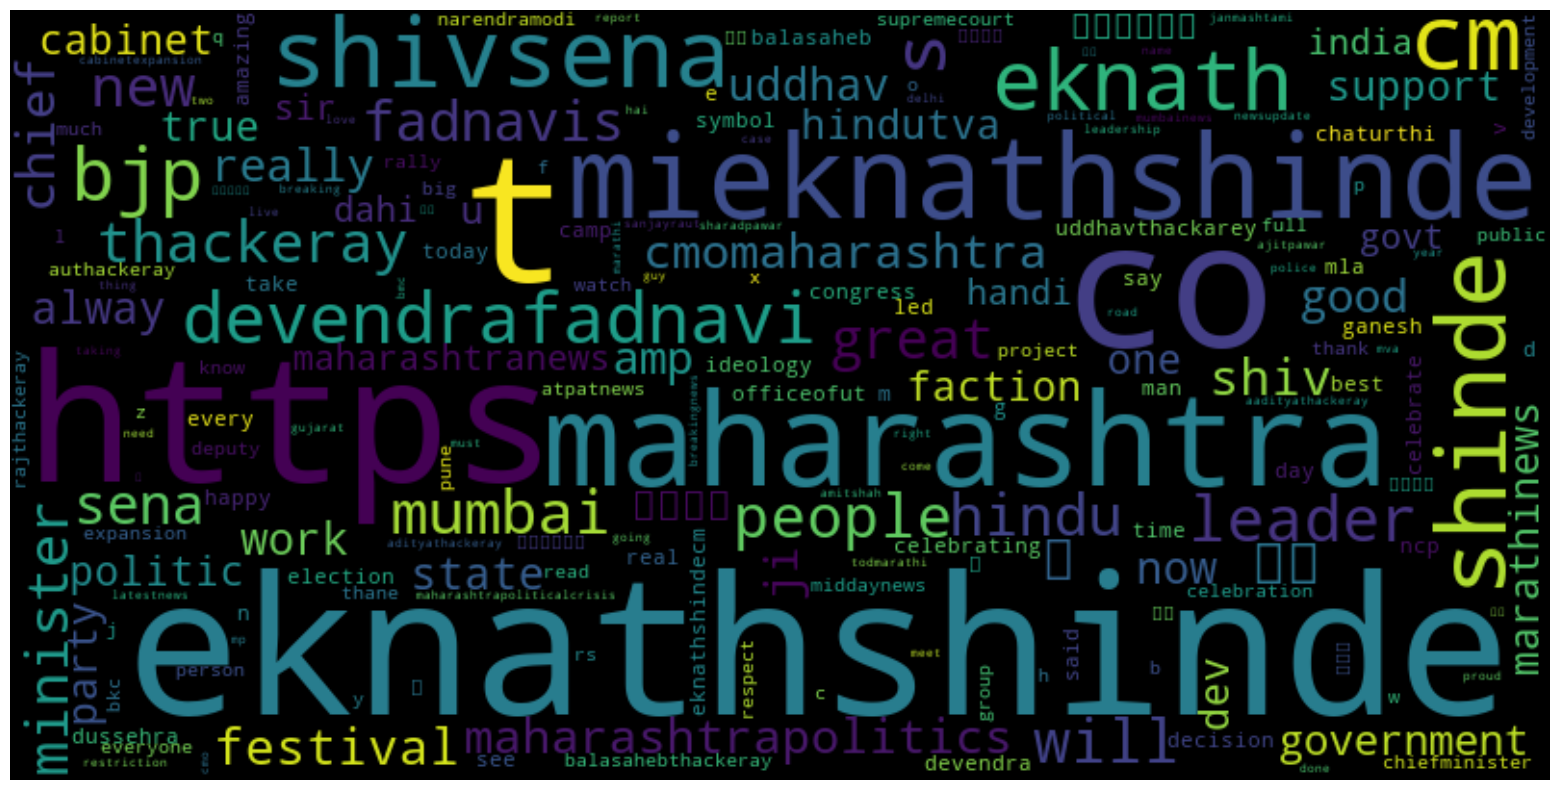

In [46]:
plt.figure(figsize = (20, 10))
plt.imshow(WordCloud_eknath, interpolation = 'bilinear')
plt.axis('off')

In [47]:
#Store all tweets as one big string
all_tweets_uddhav = ' '.join(tweet for tweet in uddhav_df1['clean_text1'])
all_tweets_uddhav

'uddhavthackarey uddhavthackeray shivsena tiger would never lick a donkey unless it s a donkey live law indian legal news have run shiv sena for years but today can t use my father s name amp symbol uddhav thackeray https t co knnb w ze via googlenews कटटर हद adityathackeray uddhavthackeray hindu bjp shivsena news trending mahadev bgmi https t co wmwydgqneb i started as a teacher after school in thane i used to teach tmc school kids maharashtra knows what shivsena has done so many years for these schools mid day meal even jobless cud educate many are working big posts bjp shud stop such lies uddhavthackeray शवसन https t co dmqci e फकत सततसठ लचर uddhavthackeray aadityathackeray shivsena https t co e plpthzp uddhavthackeray adityathackeray https t co flubss bg  middaynews hc dismisses three pils by same person against uddhav thackeray sanjay raut and ncp worker sanjayraut uddhavthackeray ncp highcourt https t co jsfn uh qi mataonline दरदव लचर uddhavthackeray aadityathackeray balasahebtha

In [48]:
WordCloud_uddhav = WordCloud(width = 800, height = 400, random_state = 21, max_font_size = 100, collocations = False).generate(all_tweets_uddhav)

(-0.5, 799.5, 399.5, -0.5)

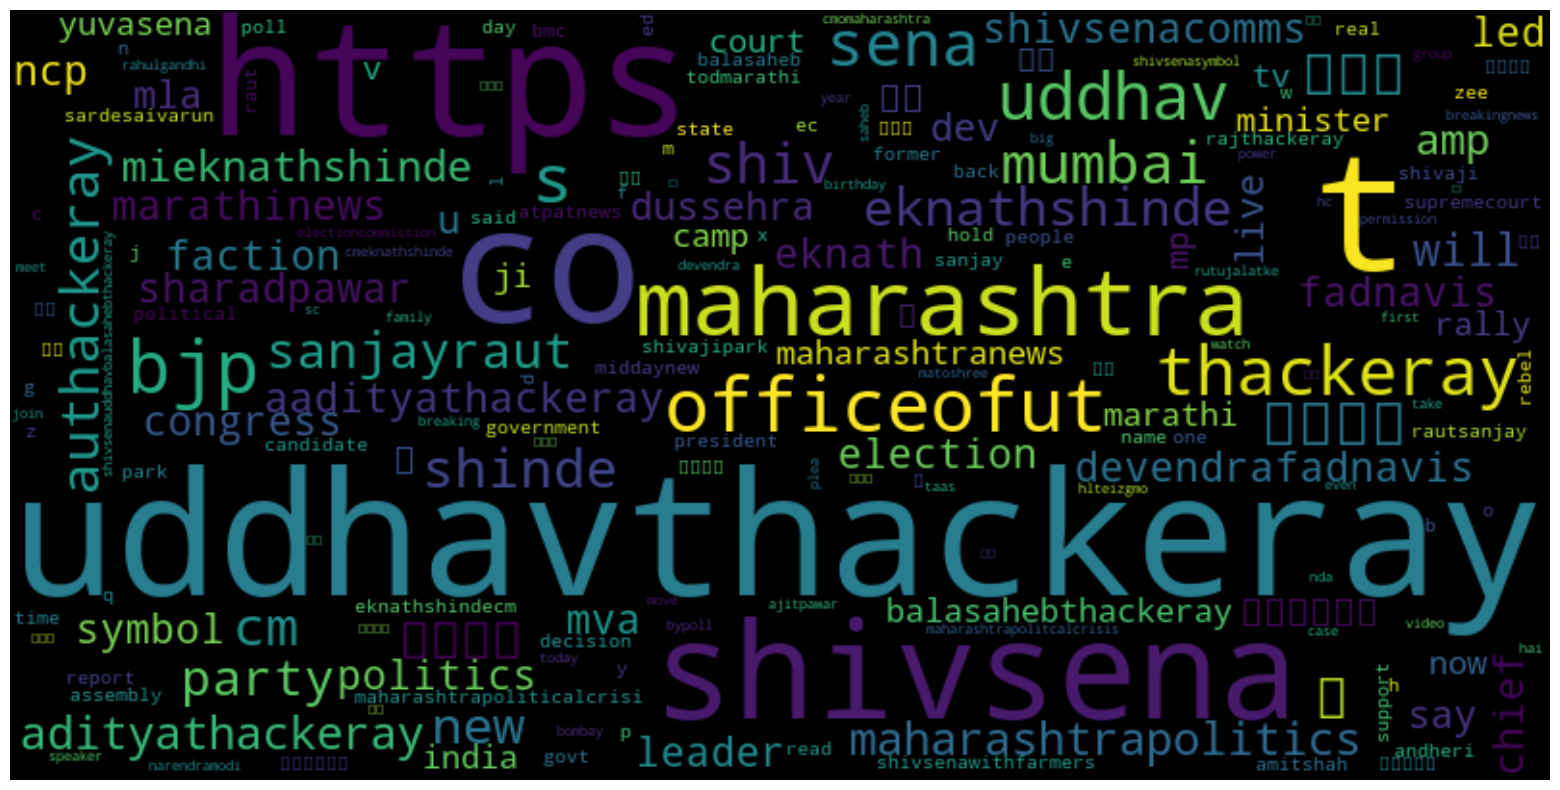

In [49]:
plt.figure(figsize = (20, 10))
plt.imshow(WordCloud_uddhav, interpolation = 'bilinear')
plt.axis('off')

In [50]:
#LEXICON-BASED TEXT PROCESSING

 
# STOPWORD REMOVAL
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)

text=stopword(text)
print(text)

message cleaned may involve things like adjacent spaces tabs


In [51]:
#STEMMING
 
# Initialize the stemmer
snow = SnowballStemmer('english')
def stemming(string):
    a=[snow.stem(i) for i in word_tokenize(string) ]
    return " ".join(a)
text=stemming(text)
print(text)

messag clean may involv thing like adjac space tab


In [52]:
#LEMMATIZATION
# Initialize the lemmatizer
wl = WordNetLemmatizer()
 
# This is a helper function to map NTLK position tags
# Full list is available here: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [53]:
# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

text = lemmatizer(text)
print(text)

messag clean may involv thing like adjac space tab


In [54]:
#FINAL PREPROCESSING - Our data:
def finalpreprocess(string):
    return lemmatizer(stopword(preprocess(string)))

In [55]:
eknath_df1['clean_tweet'] = eknath_df1['Tweet'].apply(lambda x: finalpreprocess(x))

In [56]:
eknath_df1

Like_Count  Retweet_Count         Username                       Date  \
0               1              1   HemantKothari3  2022-11-14 18:37:07+00:00   
1               0              0   ParisShivkumar  2022-11-14 18:14:20+00:00   
2               0              0   ParisShivkumar  2022-11-14 18:11:37+00:00   
3               2              0    NtnitinSodaye  2022-11-14 17:57:40+00:00   
4               0              1     BhurateVinay  2022-11-14 16:23:48+00:00   
...           ...            ...              ...                        ...   
16564          56              2        TOIMumbai  2022-07-10 08:27:56+00:00   
16565           0              0    theindianwire  2022-07-10 08:20:17+00:00   
16566           0              1          mid_day  2022-07-10 08:00:08+00:00   
16567           0              0    INFirstAlways  2022-07-10 07:49:41+00:00   
16568           2              0  sharmagandharvv  2022-07-10 07:36:10+00:00   

                                                   Tweet lang  \
0      It's #Awhad V/s Shrikant #shinde &amp; one thi...   en   
1      Sule, Pawar, Patil, and Marathi media was sile...   en   
2      Jitendra has good memory loss. He forgot last ...   en   
3      #Rajthakre #EknathShinde #udhavthakre #adityat...   en   
4      @Awhadspeaks #DevendraFadnavis #EknathShinde  ...   en   
...                                                  ...  ...   
16564  #AshadiEkadashi | CM @mieknathshinde performed...   en   
16565  Maharashtra's Chief Minister, Eknath Shinde ar...   en   
16566  Maha CM rejects Uddhav’s demand for mid-term A...   en   
16567  So #EknathShinde confirms Achhe Din aaye nahi ...   en   
16568  Seems #EknathShinde has really grown out to be...   en   

                                             clean_text1  \
0      it s awhad v s shrikant shinde amp one thing i...   
1      sule pawar patil and marathi media was silent ...   
2      jitendra has good memory loss he forgot last y...   
3      rajthakre eknathshinde udhavthakre adityathack...   
4      awhadspeaks devendrafadnavis eknathshinde wagl...   
...                                                  ...   
16564  ashadiekadashi cm mieknathshinde performed the...   
16565  maharashtra s chief minister eknath shinde arr...   
16566  maha cm rejects uddhavs demand for mid term as...   
16567  so eknathshinde confirms achhe din aaye nahi h...   
16568  seems eknathshinde has really grown out to be ...   

                                             clean_tweet  
0      awhad v shrikant shinde amp one thing notice e...  
1      sule pawar patil marathi medium silent kangana...  
2      jitendra good memory loss forget last year mva...  
3      rajthakre eknathshinde udhavthakre adityathack...  
4      awhadspeaks devendrafadnavis eknathshinde wagl...  
...                                                  ...  
16564  ashadiekadashi cm mieknathshinde perform custo...  
16565  maharashtra chief minister eknath shinde arriv...  
16566  maha cm reject uddhavs demand mid term assembl...  
16567  eknathshinde confirm achhe din aaye nahi hai h...  
16568  seem eknathshinde really grown mass leader fig...  

[16569 rows x 8 columns]

In [57]:
uddhav_df1['clean_tweet'] = uddhav_df1['Tweet'].apply(lambda x: finalpreprocess(x))

In [58]:
uddhav_df1

Like_Count  Retweet_Count         Username                       Date  \
0               0              0       Freehindus  2022-11-14 18:06:09+00:00   
1               0              0      newslyindia  2022-11-14 16:38:53+00:00   
2               2              1       Shivsmithh  2022-11-14 16:21:08+00:00   
3               5              2       kvtpotadar  2022-11-14 12:27:39+00:00   
4               2              0   jagruti_shelke  2022-11-14 11:36:34+00:00   
...           ...            ...              ...                        ...   
10873           1              0    SatheCreation  2022-07-01 00:50:43+00:00   
10874          10              2        firstpost  2022-07-01 00:44:17+00:00   
10875           5              2  DrAlpnaKulshre1  2022-07-01 00:22:42+00:00   
10876           0              0     iVimalPandey  2022-07-01 00:14:19+00:00   
10877           0              0        Ashok2103  2022-07-01 00:11:35+00:00   

                                                   Tweet lang  \
0      #UddhavThackarey\n#uddhavThackeray\n#ShivSena\...   en   
1      कट्टर हिंदू 🚩#adityathackeray #uddhavthackeray...   en   
2      I started as a teacher after school..in Thane....   en   
3      फक्त सत्तेसाठी #लाचार \n\n#UddhavThackeray \n#...   en   
4      #uddhavThackeray \n#adityathackeray https://t....   en   
...                                                  ...  ...   
10873  A big thank you to Shri #UddhavThackeray ji fo...   en   
10874  As #UddhavThackeray embarks upon rebuilding hi...   en   
10875  @PNRai1 #BigBreaking\n\n#EknathShinde to be th...   en   
10876  @Anjna116 WillB updated again, another “former...   en   
10877  Finally #UddhavThackeray extends best wishes t...   en   

                                             clean_text1  \
0      uddhavthackarey uddhavthackeray shivsena tiger...   
1      कटटर हद adityathackeray uddhavthackeray hindu ...   
2      i started as a teacher after school in thane i...   
3      फकत सततसठ लचर uddhavthackeray aadityathackeray...   
4      uddhavthackeray adityathackeray https t co flu...   
...                                                  ...   
10873  a big thank you to shri uddhavthackeray ji for...   
10874  as uddhavthackeray embarks upon rebuilding his...   
10875  pnrai bigbreaking eknathshinde to be the cm of...   
10876  anjna willb updated again another former needs...   
10877  finally uddhavthackeray extends best wishes to...   

                                             clean_tweet  
0      uddhavthackarey uddhavthackeray shivsena tiger...  
1      कटटर हद adityathackeray uddhavthackeray hindu ...  
2      start teacher school thane use teach tmc schoo...  
3      फकत सततसठ लचर uddhavthackeray aadityathackeray...  
4        uddhavthackeray adityathackeray http co flub bg  
...                                                  ...  
10873  big thank shri uddhavthackeray ji progressive ...  
10874  uddhavthackeray embark upon rebuild party take...  
10875  pnrai bigbreaking eknathshinde cm maharashtra ...  
10876  anjna willb update another former need add for...  
10877  finally uddhavthackeray extend best wish mahar...  

[10878 rows x 8 columns]

In [59]:
tweet_tokenizer = TweetTokenizer()
eknath_df1['clean_tweet_tokens'] = eknath_df1['clean_tweet'].apply(tweet_tokenizer.tokenize)

In [60]:
eknath_df1['clean_tweet_tokens'] = [', '.join(map(str, token)) for token in eknath_df1['clean_tweet_tokens']]

In [61]:
eknath_df1

Like_Count  Retweet_Count         Username                       Date  \
0               1              1   HemantKothari3  2022-11-14 18:37:07+00:00   
1               0              0   ParisShivkumar  2022-11-14 18:14:20+00:00   
2               0              0   ParisShivkumar  2022-11-14 18:11:37+00:00   
3               2              0    NtnitinSodaye  2022-11-14 17:57:40+00:00   
4               0              1     BhurateVinay  2022-11-14 16:23:48+00:00   
...           ...            ...              ...                        ...   
16564          56              2        TOIMumbai  2022-07-10 08:27:56+00:00   
16565           0              0    theindianwire  2022-07-10 08:20:17+00:00   
16566           0              1          mid_day  2022-07-10 08:00:08+00:00   
16567           0              0    INFirstAlways  2022-07-10 07:49:41+00:00   
16568           2              0  sharmagandharvv  2022-07-10 07:36:10+00:00   

                                                   Tweet lang  \
0      It's #Awhad V/s Shrikant #shinde &amp; one thi...   en   
1      Sule, Pawar, Patil, and Marathi media was sile...   en   
2      Jitendra has good memory loss. He forgot last ...   en   
3      #Rajthakre #EknathShinde #udhavthakre #adityat...   en   
4      @Awhadspeaks #DevendraFadnavis #EknathShinde  ...   en   
...                                                  ...  ...   
16564  #AshadiEkadashi | CM @mieknathshinde performed...   en   
16565  Maharashtra's Chief Minister, Eknath Shinde ar...   en   
16566  Maha CM rejects Uddhav’s demand for mid-term A...   en   
16567  So #EknathShinde confirms Achhe Din aaye nahi ...   en   
16568  Seems #EknathShinde has really grown out to be...   en   

                                             clean_text1  \
0      it s awhad v s shrikant shinde amp one thing i...   
1      sule pawar patil and marathi media was silent ...   
2      jitendra has good memory loss he forgot last y...   
3      rajthakre eknathshinde udhavthakre adityathack...   
4      awhadspeaks devendrafadnavis eknathshinde wagl...   
...                                                  ...   
16564  ashadiekadashi cm mieknathshinde performed the...   
16565  maharashtra s chief minister eknath shinde arr...   
16566  maha cm rejects uddhavs demand for mid term as...   
16567  so eknathshinde confirms achhe din aaye nahi h...   
16568  seems eknathshinde has really grown out to be ...   

                                             clean_tweet  \
0      awhad v shrikant shinde amp one thing notice e...   
1      sule pawar patil marathi medium silent kangana...   
2      jitendra good memory loss forget last year mva...   
3      rajthakre eknathshinde udhavthakre adityathack...   
4      awhadspeaks devendrafadnavis eknathshinde wagl...   
...                                                  ...   
16564  ashadiekadashi cm mieknathshinde perform custo...   
16565  maharashtra chief minister eknath shinde arriv...   
16566  maha cm reject uddhavs demand mid term assembl...   
16567  eknathshinde confirm achhe din aaye nahi hai h...   
16568  seem eknathshinde really grown mass leader fig...   

                                      clean_tweet_tokens  
0      awhad, v, shrikant, shinde, amp, one, thing, n...  
1      sule, pawar, patil, marathi, medium, silent, k...  
2      jitendra, good, memory, loss, forget, last, ye...  
3      rajthakre, eknathshinde, udhavthakre, adityath...  
4      awhadspeaks, devendrafadnavis, eknathshinde, w...  
...                                                  ...  
16564  ashadiekadashi, cm, mieknathshinde, perform, c...  
16565  maharashtra, chief, minister, eknath, shinde, ...  
16566  maha, cm, reject, uddhavs, demand, mid, term, ...  
16567  eknathshinde, confirm, achhe, din, aaye, nahi,...  
16568  seem, eknathshinde, really, grown, mass, leade...  

[16569 rows x 9 columns]

In [62]:
def vader_compound_score(tweet):
    vader = SentimentIntensityAnalyzer()
    if vader.polarity_scores(tweet)['compound'] >= 0.05:
        return 'Positive'
    elif vader.polarity_scores(tweet)['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [ ]:
eknath_df1['Vader_sent'] = eknath_df1['clean_tweet_tokens'].apply(vader_compound_score)

In [ ]:
eknath_df1

In [ ]:
#Visualisation
vader_pie_eknath = [len(eknath_df1[eknath_df1['Vader_sent'] == 'Positive']), 
             len(eknath_df1[eknath_df1['Vader_sent'] == 'Negative']), 
             len(eknath_df1[eknath_df1['Vader_sent'] == 'Neutral'])]

In [ ]:
labels = ['Positive', 'Negative', 'Neutral']
colors = ['aquamarine', 'tomato', 'skyblue']

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize = (20, 10))
plt.subplot(1, 2, 1)
plt.pie(vader_pie_eknath, labels = labels, colors = colors, autopct = '%1.1f%%')
plt.title('Vader_Group_A')

In [ ]:
uddhav_df1['clean_tweet_tokens'] = uddhav_df1['clean_tweet'].apply(tweet_tokenizer.tokenize)

In [ ]:
uddhav_df1['clean_tweet_tokens'] = [', '.join(map(str, token)) for token in uddhav_df1['clean_tweet_tokens']]

In [ ]:
uddhav_df1

In [ ]:
eknath_df1

In [99]:
eknath_df1.to_csv('Eknath_Vader.csv', encoding = 'utf-8')

In [ ]:
eknath_df1['clean_text_tok_modelling']=[nltk.word_tokenize(i) for i in eknath_df1['clean_tweet']] #convert preprocessed sentence to tokenized sentence
eknath_df1

In [ ]:
#for model-building
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score


In [ ]:
#SPLITTING THE TRAINING DATASET INTO TRAINING AND TESTING

X_train_eknath, X_val_eknath, y_train_eknath, y_val_eknath = train_test_split(eknath_df1["clean_tweet"],
                                                  eknath_df1["Vader_sent"],
                                                  test_size=0.3,
                                                  random_state=45)

In [ ]:
model_eknath = Word2Vec(eknath_df1['clean_text_tok_modelling'],min_count=1)  #min_count=1 means word should be present at least across all documents,
#if min_count=2 means if the word is present less than 2 times across all the documents then we shouldn't consider it
w2v = dict(zip(model_eknath.wv.index_to_key, model_eknath.wv.vectors)) #for converting sentence to vectors/numbers from word vectors result by Word2Vec

In [ ]:
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(next(iter(word2vec.values())))

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

In [ ]:
X_train_tok_eknath= [nltk.word_tokenize(i) for i in X_train_eknath]  #for word2vec
X_val_tok_eknath= [nltk.word_tokenize(i) for i in X_val_eknath]      #for word2vec

In [ ]:
#Word2vec
# Fit and transform
modelw_eknath = MeanEmbeddingVectorizer(w2v)
X_train_vectors_w2v_eknath = modelw_eknath.transform(X_train_tok_eknath)
X_val_vectors_w2v_eknath = modelw_eknath.transform(X_val_tok_eknath)

In [ ]:
X_val_eknath

In [ ]:
#TF-IDF
# Convert x_train to vector since model can only run on numbers and not words- Fit and transform
tfidf_vectorizer_eknath = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf_eknath = tfidf_vectorizer_eknath.fit_transform(X_train_eknath) #tfidf runs on non-tokenized sentences unlike word2vec
# Only transform x_test (not fit and transform)
X_val_vectors_tfidf_eknath = tfidf_vectorizer_eknath.transform(X_val_eknath) #Don't fit() your TfidfVectorizer to your test data: it will 
#change the word-indexes & weights to match test data. Rather, fit on the training data, then use the same train-data-
#fit model on the test data, to reflect the fact you're analyzing the test data only based on what was learned without 
#it, and the have compatible

In [ ]:
#FITTING THE CLASSIFICATION MODEL using SVM (tf-idf):

svm_tfidf_eknath = SVC(probability=True,kernel = "linear")
svm_tfidf_eknath.fit(X_train_vectors_tfidf_eknath, y_train_eknath) #model


predicted_svm_tfidf_eknath = svm_tfidf_eknath.predict(X_val_vectors_tfidf_eknath)
accuracy_svm_tfidf_eknath = svm_tfidf_eknath.score(X_val_vectors_tfidf_eknath, y_val_eknath)

print("Accuracy:", accuracy_svm_tfidf_eknath)
print(classification_report(y_val_eknath,predicted_svm_tfidf_eknath))
print('Confusion Matrix:',confusion_matrix(y_val_eknath, predicted_svm_tfidf_eknath))

#Tried using all the kernels, linear kernel gives the highest accuracy (We rely on accuracy as our data is approximately balanced)

In [ ]:
predicted_svm_tfidf_eknath_train = svm_tfidf_eknath.predict(X_train_vectors_tfidf_eknath)
predicted_svm_tfidf_eknath_test = predicted_svm_tfidf_eknath


In [114]:
#FITTING THE CLASSIFICATION MODEL using Naive Bayes(tf-idf)

nb_tfidf_eknath = MultinomialNB()
nb_tfidf_eknath.fit(X_train_vectors_tfidf_eknath, y_train_eknath)  #model

#Predict y value for test dataset
y_predict_eknath = nb_tfidf_eknath.predict(X_val_vectors_tfidf_eknath)
y_prob_eknath = nb_tfidf_eknath.predict_proba(X_val_vectors_tfidf_eknath)[:,1]
 
print("Accuracy is:",accuracy_score(y_val_eknath,y_predict_eknath))
print(classification_report(y_val_eknath,y_predict_eknath))
print('Confusion Matrix:',confusion_matrix(y_val_eknath, y_predict_eknath))


Accuracy is: 0.7322470327901831
              precision    recall  f1-score   support

    Negative       0.95      0.03      0.06       660
     Neutral       0.83      0.72      0.77      2050
    Positive       0.67      0.95      0.79      2261

    accuracy                           0.73      4971
   macro avg       0.82      0.57      0.54      4971
weighted avg       0.78      0.73      0.68      4971

Confusion Matrix: [[  19  178  463]
 [   0 1478  572]
 [   1  117 2143]]


In [115]:
#FITTING THE CLASSIFICATION MODEL using Logistic Regression(tf-idf)

digreg_eknath = linear_model.LogisticRegression(max_iter = 300)
digreg_eknath.fit(X_train_vectors_tfidf_eknath, y_train_eknath)

#Predict y value for test dataset
y_pred_eknath = digreg_eknath.predict(X_val_vectors_tfidf_eknath)

print("Accuracy is:",accuracy_score(y_val_eknath,y_pred_eknath))
print(classification_report(y_val_eknath,y_pred_eknath))
print('Confusion Matrix:',confusion_matrix(y_val_eknath, y_pred_eknath))


Accuracy is: 0.8414805874069604
              precision    recall  f1-score   support

    Negative       0.85      0.48      0.61       660
     Neutral       0.81      0.91      0.86      2050
    Positive       0.87      0.89      0.88      2261

    accuracy                           0.84      4971
   macro avg       0.85      0.76      0.78      4971
weighted avg       0.84      0.84      0.83      4971

Confusion Matrix: [[ 317  219  124]
 [  17 1858  175]
 [  37  216 2008]]


100%|██████████| 50/50 [04:02<00:00,  4.85s/it]


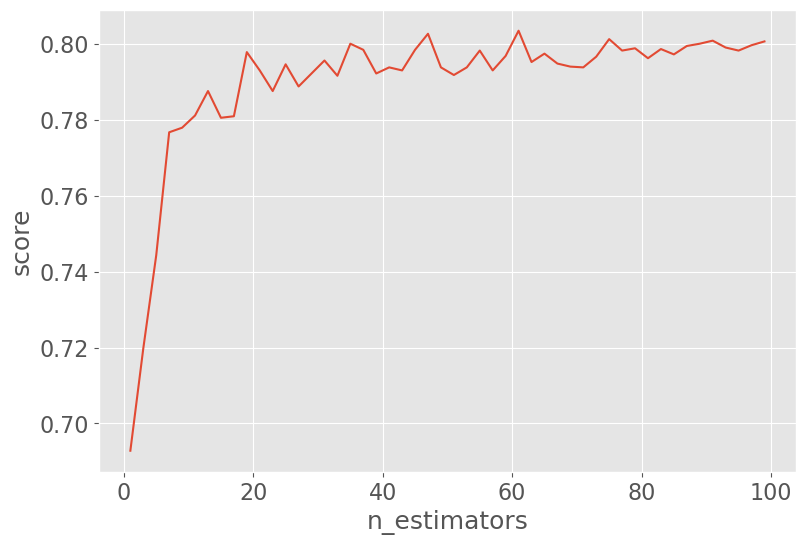

In [127]:
from tqdm import tqdm
#FITTING THE CLASSIFICATION MODEL using RF (tf-idf):
estimator_range = []
for i in range(1,101,2):
    estimator_range.append(i)
models = []
scores = []

for n_estimators in tqdm(estimator_range):

    # Create RF classifier
    clf_RF_eknath = RandomForestClassifier(n_estimators = n_estimators)
    clf_RF_eknath.fit(X_train_vectors_tfidf_eknath, y_train_eknath)  #model

    # Append the model and score to their respective list
    models.append(clf_RF_eknath)
    scores.append(accuracy_score(y_true = y_val_eknath, y_pred = clf_RF_eknath.predict(X_val_vectors_tfidf_eknath)))

# Generate the plot of scores against number of estimators
plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.show()

In [128]:
#FITTING THE CLASSIFICATION MODEL using Random forest(tf-idf) using best obtained n_estimators value = 62

# creating a RF classifier
clf_eknath = RandomForestClassifier(n_estimators = 62) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_eknath.fit(X_train_vectors_tfidf_eknath, y_train_eknath)
 
# performing predictions on the test dataset
y_pred_eknath_RF = clf_eknath.predict(X_val_vectors_tfidf_eknath)
 
print("Accuracy is:",accuracy_score(y_val_eknath,y_pred_eknath_RF))
print(classification_report(y_val_eknath,y_pred_eknath_RF))
print('Confusion Matrix:',confusion_matrix(y_val_eknath, y_pred_eknath_RF))
 


Accuracy is: 0.7964192315429491
              precision    recall  f1-score   support

    Negative       0.91      0.26      0.40       660
     Neutral       0.75      0.90      0.82      2050
    Positive       0.84      0.86      0.85      2261

    accuracy                           0.80      4971
   macro avg       0.83      0.67      0.69      4971
weighted avg       0.81      0.80      0.78      4971

Confusion Matrix: [[ 169  311  180]
 [   6 1851  193]
 [  11  311 1939]]


C:\Users\Vinayak Mokashi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Vinayak Mokashi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be ac

C:\Users\Vinayak Mokashi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Vinayak Mokashi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be ac

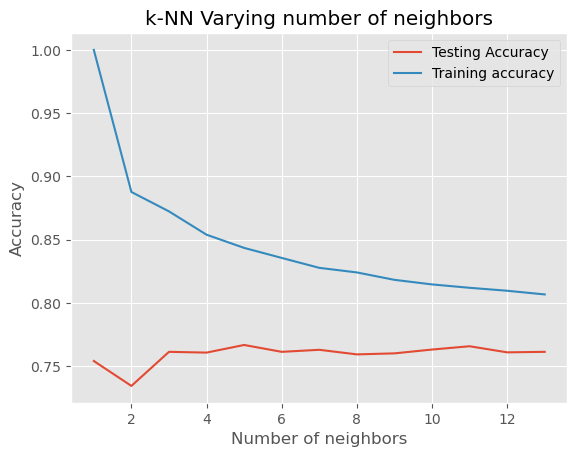

In [129]:
#FITTING THE CLASSIFICATION MODEL using KNN (tf-idf) 


neighbors_eknath = np.arange(1,14)
train_accuracy_eknath =np.empty(len(neighbors_eknath))
test_accuracy_eknath = np.empty(len(neighbors_eknath))

for i,k in enumerate(neighbors_eknath):
    knn_eknath = KNeighborsClassifier(n_neighbors=k)
    knn_eknath.fit(X_train_vectors_tfidf_eknath, y_train_eknath)
    train_accuracy_eknath[i] = knn_eknath.score(X_train_vectors_tfidf_eknath, y_train_eknath)
    test_accuracy_eknath[i] = knn_eknath.score(X_val_vectors_tfidf_eknath,y_val_eknath)
    
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors_eknath, test_accuracy_eknath, label='Testing Accuracy')
plt.plot(neighbors_eknath, train_accuracy_eknath, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [130]:
#KNN using best k = 5

knn_eknath_Best = KNeighborsClassifier(n_neighbors=5)
knn_eknath_Best.fit(X_train_vectors_tfidf_eknath, y_train_eknath)
y_pred_knn_eknath = knn_eknath_Best.predict(X_val_vectors_tfidf_eknath)

print("Accuracy is:",accuracy_score(y_val_eknath,y_pred_knn_eknath))
print(classification_report(y_val_eknath,y_pred_knn_eknath))
print('Confusion Matrix:',confusion_matrix(y_val_eknath, y_pred_knn_eknath))

Accuracy is: 0.7666465499899416
              precision    recall  f1-score   support

    Negative       0.61      0.48      0.54       660
     Neutral       0.76      0.81      0.79      2050
    Positive       0.80      0.81      0.81      2261

    accuracy                           0.77      4971
   macro avg       0.73      0.70      0.71      4971
weighted avg       0.76      0.77      0.76      4971

Confusion Matrix: [[ 314  189  157]
 [  93 1669  288]
 [ 106  327 1828]]


C:\Users\Vinayak Mokashi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [131]:
#FITTING THE CLASSIFICATION MODEL using SVM (W2v)
svm_w2v = SVC(probability=True,kernel = "linear")
svm_w2v.fit(X_train_vectors_w2v_eknath, y_train_eknath)  #model

#Predict y value for test dataset
y_predict_w2v_svm = svm_w2v.predict(X_val_vectors_w2v_eknath)

print("Accuracy:", accuracy_score(y_val_eknath,y_predict_w2v_svm))
print(classification_report(y_val_eknath,y_predict_w2v_svm))
print('Confusion Matrix:',confusion_matrix(y_val_eknath,y_predict_w2v_svm))

#Tried using all the kernels, linear kernel gives the highest accuracy (We rely on accuracy as our data is approximately balanced)

Accuracy: 0.7113256889961779
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       660
     Neutral       0.69      0.83      0.75      2050
    Positive       0.73      0.81      0.77      2261

    accuracy                           0.71      4971
   macro avg       0.47      0.55      0.51      4971
weighted avg       0.62      0.71      0.66      4971

Confusion Matrix: [[   0  332  328]
 [   0 1698  352]
 [   0  423 1838]]


C:\Users\Vinayak Mokashi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vinayak Mokashi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vinayak Mokashi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [132]:
#FITTING THE CLASSIFICATION MODEL using Naive Bayes(W2v)

nb_w2v = GaussianNB()
nb_w2v.fit(X_train_vectors_w2v_eknath, y_train_eknath)  #model

#Predict y value for test dataset
y_predict_w2v_eknath_nb = nb_w2v.predict(X_val_vectors_w2v_eknath)
y_prob_w2v = nb_w2v.predict_proba(X_val_vectors_w2v_eknath)[:,1]
 
print("Accuracy is:",accuracy_score(y_val_eknath,y_predict_w2v_eknath_nb))
print(classification_report(y_val_eknath,y_predict_w2v_eknath_nb))
print('Confusion Matrix:',confusion_matrix(y_val_eknath,y_predict_w2v_eknath_nb))


Accuracy is: 0.6165761416214042
              precision    recall  f1-score   support

    Negative       0.26      0.72      0.38       660
     Neutral       0.85      0.60      0.70      2050
    Positive       0.81      0.60      0.69      2261

    accuracy                           0.62      4971
   macro avg       0.64      0.64      0.59      4971
weighted avg       0.75      0.62      0.65      4971

Confusion Matrix: [[ 476   96   88]
 [ 590 1235  225]
 [ 778  129 1354]]


In [133]:
#FITTING THE CLASSIFICATION MODEL using Logistic Regression(w2v)

digreg_eknath_w2v = linear_model.LogisticRegression(max_iter = 500)
digreg_eknath_w2v.fit(X_train_vectors_w2v_eknath,y_train_eknath)

#Predict y value for test dataset
y_pred_eknath_w2v_LR = digreg_eknath_w2v.predict(X_val_vectors_w2v_eknath)

print("Accuracy is:",accuracy_score(y_val_eknath,y_pred_eknath_w2v_LR))
print(classification_report(y_val_eknath,y_pred_eknath_w2v_LR))
print('C#onfusion Matrix:',confusion_matrix(y_val_eknath,y_pred_eknath_w2v_LR))

Accuracy is: 0.7125326895996781
              precision    recall  f1-score   support

    Negative       0.41      0.05      0.09       660
     Neutral       0.70      0.81      0.75      2050
    Positive       0.73      0.81      0.77      2261

    accuracy                           0.71      4971
   macro avg       0.61      0.56      0.54      4971
weighted avg       0.68      0.71      0.67      4971

C#onfusion Matrix: [[  32  323  305]
 [  15 1668  367]
 [  31  388 1842]]


100%|██████████| 50/50 [00:00<?, ?it/s]


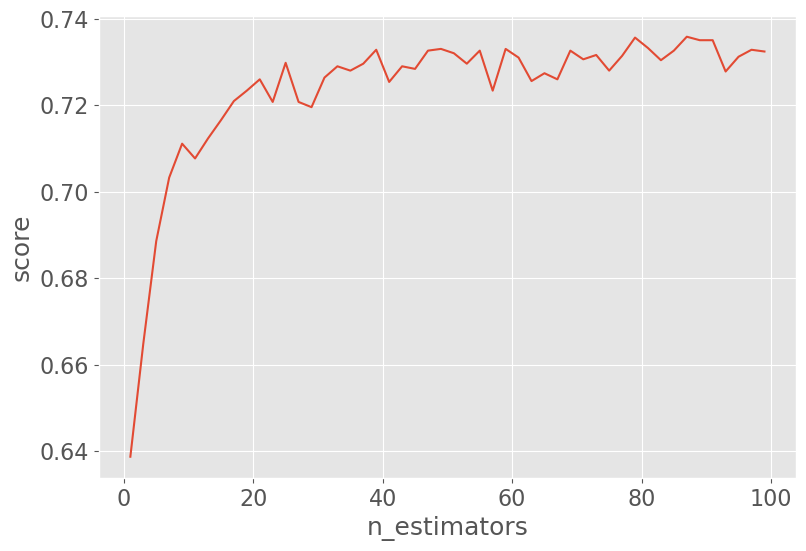

In [135]:
from tqdm import tqdm
#FITTING THE CLASSIFICATION MODEL using RF (w2v):
estimator_range = []
for i in tqdm(range(1,101,2)):
    estimator_range.append(i)
models = []
scores = []

for n_estimators in estimator_range:

    # Create RF classifier
    clf_RF_eknath_w2v = RandomForestClassifier(n_estimators = n_estimators)
    clf_RF_eknath_w2v.fit(X_train_vectors_w2v_eknath, y_train_eknath)  #model

    # Append the model and score to their respective list
    models.append(clf_RF_eknath_w2v)
    scores.append(accuracy_score(y_true = y_val_eknath, y_pred = clf_RF_eknath_w2v.predict(X_val_vectors_w2v_eknath)))

# Generate the plot of scores against number of estimators
plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.show()

In [136]:
#FITTING THE CLASSIFICATION MODEL using Random forest(w2v) using best obtained n_estimators value = 78

# creating a RF classifier
clf_eknath_rf_w2v = RandomForestClassifier(n_estimators = 78) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf_eknath_rf_w2v.fit(X_train_vectors_w2v_eknath, y_train_eknath)
 
# performing predictions on the test dataset
y_pred_eknath_rf_w2v = clf_eknath_rf_w2v.predict(X_val_vectors_w2v_eknath)
 
print("Accuracy is:",accuracy_score(y_val_eknath,y_pred_eknath_rf_w2v))
print(classification_report(y_val_eknath,y_pred_eknath_rf_w2v))
print('Confusion Matrix:',confusion_matrix(y_val_eknath, y_pred_eknath_rf_w2v))

Accuracy is: 0.7334540333936833
              precision    recall  f1-score   support

    Negative       0.51      0.22      0.30       660
     Neutral       0.75      0.80      0.77      2050
    Positive       0.74      0.83      0.78      2261

    accuracy                           0.73      4971
   macro avg       0.67      0.61      0.62      4971
weighted avg       0.72      0.73      0.72      4971

Confusion Matrix: [[ 143  228  289]
 [  60 1635  355]
 [  80  313 1868]]


C:\Users\Vinayak Mokashi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Vinayak Mokashi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be ac

C:\Users\Vinayak Mokashi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Vinayak Mokashi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be ac

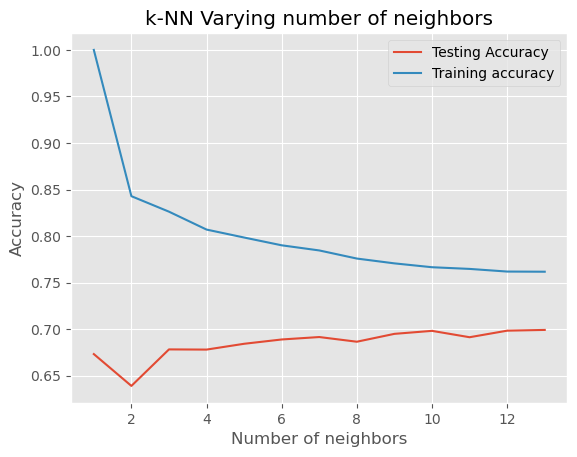

In [137]:
#FITTING THE CLASSIFICATION MODEL using KNN (w2v) 


neighbors_eknath_w2v = np.arange(1,14)
train_accuracy_eknath_w2v =np.empty(len(neighbors_eknath_w2v))
test_accuracy_eknath_w2v = np.empty(len(neighbors_eknath_w2v))

for i,k in enumerate(neighbors_eknath_w2v):
    knn_eknath_w2v = KNeighborsClassifier(n_neighbors=k)
    knn_eknath_w2v.fit(X_train_vectors_w2v_eknath, y_train_eknath)
    train_accuracy_eknath_w2v[i] = knn_eknath_w2v.score(X_train_vectors_w2v_eknath, y_train_eknath)
    test_accuracy_eknath_w2v[i] = knn_eknath_w2v.score(X_val_vectors_w2v_eknath,y_val_eknath)
    
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors_eknath_w2v, test_accuracy_eknath_w2v, label='Testing Accuracy')
plt.plot(neighbors_eknath_w2v, train_accuracy_eknath_w2v, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [138]:
#KNN using best k = 13

knn_eknath_Best_w2v = KNeighborsClassifier(n_neighbors=13)
knn_eknath_Best_w2v.fit(X_train_vectors_w2v_eknath, y_train_eknath)
y_pred_knn_eknath_w2v = knn_eknath_Best_w2v.predict(X_val_vectors_w2v_eknath)

print("Accuracy is:",accuracy_score(y_val_eknath,y_pred_knn_eknath_w2v))
print(classification_report(y_val_eknath,y_pred_knn_eknath_w2v))
print('Confusion Matrix:',confusion_matrix(y_val_eknath, y_pred_knn_eknath_w2v))

Accuracy is: 0.6992556829611748
              precision    recall  f1-score   support

    Negative       0.35      0.23      0.28       660
     Neutral       0.74      0.76      0.75      2050
    Positive       0.73      0.78      0.75      2261

    accuracy                           0.70      4971
   macro avg       0.60      0.59      0.59      4971
weighted avg       0.68      0.70      0.69      4971

Confusion Matrix: [[ 151  222  287]
 [ 119 1561  370]
 [ 165  332 1764]]


C:\Users\Vinayak Mokashi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


#### Best Accuracy - SVM tf-idf is 86.9 %

In [139]:
uddhav_df1

Like_Count  Retweet_Count         Username                       Date  \
0               0              0       Freehindus  2022-11-14 18:06:09+00:00   
1               0              0      newslyindia  2022-11-14 16:38:53+00:00   
2               2              1       Shivsmithh  2022-11-14 16:21:08+00:00   
3               5              2       kvtpotadar  2022-11-14 12:27:39+00:00   
4               2              0   jagruti_shelke  2022-11-14 11:36:34+00:00   
...           ...            ...              ...                        ...   
10873           1              0    SatheCreation  2022-07-01 00:50:43+00:00   
10874          10              2        firstpost  2022-07-01 00:44:17+00:00   
10875           5              2  DrAlpnaKulshre1  2022-07-01 00:22:42+00:00   
10876           0              0     iVimalPandey  2022-07-01 00:14:19+00:00   
10877           0              0        Ashok2103  2022-07-01 00:11:35+00:00   

                                                   Tweet lang  \
0      #UddhavThackarey\n#uddhavThackeray\n#ShivSena\...   en   
1      कट्टर हिंदू 🚩#adityathackeray #uddhavthackeray...   en   
2      I started as a teacher after school..in Thane....   en   
3      फक्त सत्तेसाठी #लाचार \n\n#UddhavThackeray \n#...   en   
4      #uddhavThackeray \n#adityathackeray https://t....   en   
...                                                  ...  ...   
10873  A big thank you to Shri #UddhavThackeray ji fo...   en   
10874  As #UddhavThackeray embarks upon rebuilding hi...   en   
10875  @PNRai1 #BigBreaking\n\n#EknathShinde to be th...   en   
10876  @Anjna116 WillB updated again, another “former...   en   
10877  Finally #UddhavThackeray extends best wishes t...   en   

                                             clean_text1  \
0      uddhavthackarey uddhavthackeray shivsena tiger...   
1      कटटर हद adityathackeray uddhavthackeray hindu ...   
2      i started as a teacher after school in thane i...   
3      फकत सततसठ लचर uddhavthackeray aadityathackeray...   
4      uddhavthackeray adityathackeray https t co flu...   
...                                                  ...   
10873  a big thank you to shri uddhavthackeray ji for...   
10874  as uddhavthackeray embarks upon rebuilding his...   
10875  pnrai bigbreaking eknathshinde to be the cm of...   
10876  anjna willb updated again another former needs...   
10877  finally uddhavthackeray extends best wishes to...   

                                             clean_tweet  \
0      uddhavthackarey uddhavthackeray shivsena tiger...   
1      कटटर हद adityathackeray uddhavthackeray hindu ...   
2      start teacher school thane use teach tmc schoo...   
3      फकत सततसठ लचर uddhavthackeray aadityathackeray...   
4        uddhavthackeray adityathackeray http co flub bg   
...                                                  ...   
10873  big thank shri uddhavthackeray ji progressive ...   
10874  uddhavthackeray embark upon rebuild party take...   
10875  pnrai bigbreaking eknathshinde cm maharashtra ...   
10876  anjna willb update another former need add for...   
10877  finally uddhavthackeray extend best wish mahar...   

                                      clean_tweet_tokens  
0      uddhavthackarey, uddhavthackeray, shivsena, ti...  
1      कटटर, हद, adityathackeray, uddhavthackeray, hi...  
2      start, teacher, school, thane, use, teach, tmc...  
3      फकत, सततसठ, लचर, uddhavthackeray, aadityathack...  
4      uddhavthackeray, adityathackeray, http, co, fl...  
...                                                  ...  
10873  big, thank, shri, uddhavthackeray, ji, progres...  
10874  uddhavthackeray, embark, upon, rebuild, party,...  
10875  pnrai, bigbreaking, eknathshinde, cm, maharash...  
10876  anjna, willb, update, another, former, need, a...  
10877  finally, uddhavthackeray, extend, best, wish, ...  

[10878 rows x 9 columns]

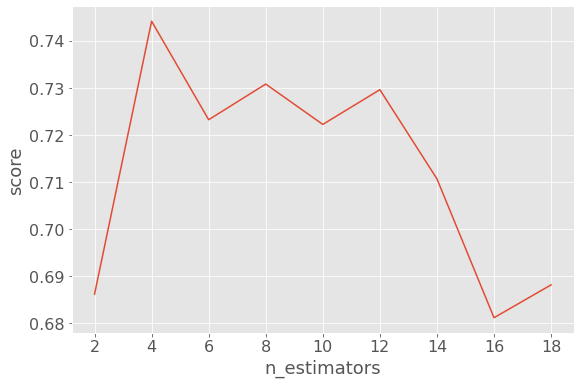

In [75]:
#Boosting using SVM(tf-idf)

estimator_range = [2,4,6,8,10,12,14,16,18]

models = []
scores = []

for n_estimators in estimator_range:

    # Create boosting classifier
    clf_adaboosting_svm_tfidf = AdaBoostClassifier(base_estimator=svm_tfidf_eknath,n_estimators=n_estimators)

    # Fit the model
    clf_adaboosting_svm_tfidf.fit(X_train_vectors_tfidf_eknath, y_train_eknath)  #model

    # Append the model and score to their respective list
    models.append(clf_adaboosting_svm_tfidf)
    scores.append(accuracy_score(y_true = y_val_eknath, y_pred = clf_adaboosting_svm_tfidf.predict(X_val_vectors_tfidf_eknath)))

# Generate the plot of scores against number of estimators
plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.show()

#no Point in fitting since accuracy is lesser than SVM tf-idf

In [140]:
#Using SVM ifidf
X_test=uddhav_df1['clean_tweet'] 
X_vector=tfidf_vectorizer_eknath.transform(X_test) #converting X_test to vector
y_predict = svm_tfidf_eknath.predict(X_vector)      #use the trained model on X_vector


In [141]:
y_predict

array(['Negative', 'Neutral', 'Negative', ..., 'Neutral', 'Positive',
       'Positive'], dtype=object)

In [142]:
len(y_predict)

10878

In [143]:
uddhav_df1['Predicted'] = y_predict

In [144]:
uddhav_df1

Like_Count  Retweet_Count         Username                       Date  \
0               0              0       Freehindus  2022-11-14 18:06:09+00:00   
1               0              0      newslyindia  2022-11-14 16:38:53+00:00   
2               2              1       Shivsmithh  2022-11-14 16:21:08+00:00   
3               5              2       kvtpotadar  2022-11-14 12:27:39+00:00   
4               2              0   jagruti_shelke  2022-11-14 11:36:34+00:00   
...           ...            ...              ...                        ...   
10873           1              0    SatheCreation  2022-07-01 00:50:43+00:00   
10874          10              2        firstpost  2022-07-01 00:44:17+00:00   
10875           5              2  DrAlpnaKulshre1  2022-07-01 00:22:42+00:00   
10876           0              0     iVimalPandey  2022-07-01 00:14:19+00:00   
10877           0              0        Ashok2103  2022-07-01 00:11:35+00:00   

                                                   Tweet lang  \
0      #UddhavThackarey\n#uddhavThackeray\n#ShivSena\...   en   
1      कट्टर हिंदू 🚩#adityathackeray #uddhavthackeray...   en   
2      I started as a teacher after school..in Thane....   en   
3      फक्त सत्तेसाठी #लाचार \n\n#UddhavThackeray \n#...   en   
4      #uddhavThackeray \n#adityathackeray https://t....   en   
...                                                  ...  ...   
10873  A big thank you to Shri #UddhavThackeray ji fo...   en   
10874  As #UddhavThackeray embarks upon rebuilding hi...   en   
10875  @PNRai1 #BigBreaking\n\n#EknathShinde to be th...   en   
10876  @Anjna116 WillB updated again, another “former...   en   
10877  Finally #UddhavThackeray extends best wishes t...   en   

                                             clean_text1  \
0      uddhavthackarey uddhavthackeray shivsena tiger...   
1      कटटर हद adityathackeray uddhavthackeray hindu ...   
2      i started as a teacher after school in thane i...   
3      फकत सततसठ लचर uddhavthackeray aadityathackeray...   
4      uddhavthackeray adityathackeray https t co flu...   
...                                                  ...   
10873  a big thank you to shri uddhavthackeray ji for...   
10874  as uddhavthackeray embarks upon rebuilding his...   
10875  pnrai bigbreaking eknathshinde to be the cm of...   
10876  anjna willb updated again another former needs...   
10877  finally uddhavthackeray extends best wishes to...   

                                             clean_tweet  \
0      uddhavthackarey uddhavthackeray shivsena tiger...   
1      कटटर हद adityathackeray uddhavthackeray hindu ...   
2      start teacher school thane use teach tmc schoo...   
3      फकत सततसठ लचर uddhavthackeray aadityathackeray...   
4        uddhavthackeray adityathackeray http co flub bg   
...                                                  ...   
10873  big thank shri uddhavthackeray ji progressive ...   
10874  uddhavthackeray embark upon rebuild party take...   
10875  pnrai bigbreaking eknathshinde cm maharashtra ...   
10876  anjna willb update another former need add for...   
10877  finally uddhavthackeray extend best wish mahar...   

                                      clean_tweet_tokens Predicted  
0      uddhavthackarey, uddhavthackeray, shivsena, ti...  Negative  
1      कटटर, हद, adityathackeray, uddhavthackeray, hi...   Neutral  
2      start, teacher, school, thane, use, teach, tmc...  Negative  
3      फकत, सततसठ, लचर, uddhavthackeray, aadityathack...   Neutral  
4      uddhavthackeray, adityathackeray, http, co, fl...   Neutral  
...                                                  ...       ...  
10873  big, thank, shri, uddhavthackeray, ji, progres...  Positive  
10874  uddhavthackeray, embark, upon, rebuild, party,...  Positive  
10875  pnrai, bigbreaking, eknathshinde, cm, maharash...   Neutral  
10876  anjna, willb, update, another, former, need, a...  Positive  
10877  finally, uddhavthackeray, extend, best, wish, ...  Positi

Text(0.5, 1.0, 'GroupB')

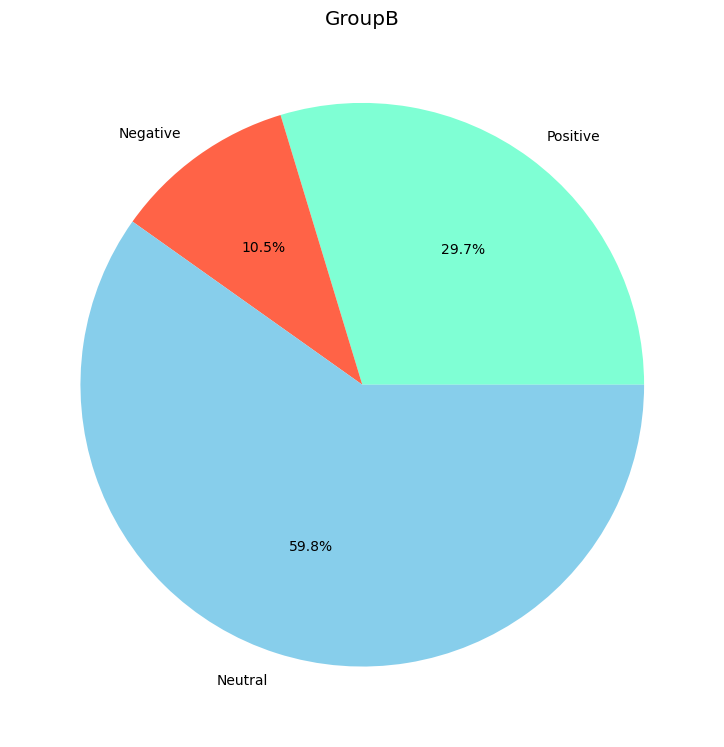

In [162]:
#Visualisation
pie_uddhav = [len(uddhav_df1[uddhav_df1['Predicted'] == 'Positive']), 
             len(uddhav_df1[uddhav_df1['Predicted'] == 'Negative']), 
             len(uddhav_df1[uddhav_df1['Predicted'] == 'Neutral'])]

labels = ['Positive', 'Negative', 'Neutral']
colors = ['aquamarine', 'tomato', 'skyblue']

plt.style.use('ggplot')
plt.figure(figsize = (20, 10))
plt.subplot(1, 2, 1)
plt.pie(pie_uddhav, labels = labels, colors = colors, autopct = '%1.1f%%')
plt.title('GroupB')

In [146]:
eknath_df1

Like_Count  Retweet_Count         Username                       Date  \
0               1              1   HemantKothari3  2022-11-14 18:37:07+00:00   
1               0              0   ParisShivkumar  2022-11-14 18:14:20+00:00   
2               0              0   ParisShivkumar  2022-11-14 18:11:37+00:00   
3               2              0    NtnitinSodaye  2022-11-14 17:57:40+00:00   
4               0              1     BhurateVinay  2022-11-14 16:23:48+00:00   
...           ...            ...              ...                        ...   
16564          56              2        TOIMumbai  2022-07-10 08:27:56+00:00   
16565           0              0    theindianwire  2022-07-10 08:20:17+00:00   
16566           0              1          mid_day  2022-07-10 08:00:08+00:00   
16567           0              0    INFirstAlways  2022-07-10 07:49:41+00:00   
16568           2              0  sharmagandharvv  2022-07-10 07:36:10+00:00   

                                                   Tweet lang  \
0      It's #Awhad V/s Shrikant #shinde &amp; one thi...   en   
1      Sule, Pawar, Patil, and Marathi media was sile...   en   
2      Jitendra has good memory loss. He forgot last ...   en   
3      #Rajthakre #EknathShinde #udhavthakre #adityat...   en   
4      @Awhadspeaks #DevendraFadnavis #EknathShinde  ...   en   
...                                                  ...  ...   
16564  #AshadiEkadashi | CM @mieknathshinde performed...   en   
16565  Maharashtra's Chief Minister, Eknath Shinde ar...   en   
16566  Maha CM rejects Uddhav’s demand for mid-term A...   en   
16567  So #EknathShinde confirms Achhe Din aaye nahi ...   en   
16568  Seems #EknathShinde has really grown out to be...   en   

                                             clean_text1  \
0      it s awhad v s shrikant shinde amp one thing i...   
1      sule pawar patil and marathi media was silent ...   
2      jitendra has good memory loss he forgot last y...   
3      rajthakre eknathshinde udhavthakre adityathack...   
4      awhadspeaks devendrafadnavis eknathshinde wagl...   
...                                                  ...   
16564  ashadiekadashi cm mieknathshinde performed the...   
16565  maharashtra s chief minister eknath shinde arr...   
16566  maha cm rejects uddhavs demand for mid term as...   
16567  so eknathshinde confirms achhe din aaye nahi h...   
16568  seems eknathshinde has really grown out to be ...   

                                             clean_tweet  \
0      awhad v shrikant shinde amp one thing notice e...   
1      sule pawar patil marathi medium silent kangana...   
2      jitendra good memory loss forget last year mva...   
3      rajthakre eknathshinde udhavthakre adityathack...   
4      awhadspeaks devendrafadnavis eknathshinde wagl...   
...                                                  ...   
16564  ashadiekadashi cm mieknathshinde perform custo...   
16565  maharashtra chief minister eknath shinde arriv...   
16566  maha cm reject uddhavs demand mid term assembl...   
16567  eknathshinde confirm achhe din aaye nahi hai h...   
16568  seem eknathshinde really grown mass leader fig...   

                                      clean_tweet_tokens Vader_sent  \
0      awhad, v, shrikant, shinde, amp, one, thing, n...    Neutral   
1      sule, pawar, patil, marathi, medium, silent, k...   Positive   
2      jitendra, good, memory, loss, forget, last, ye...   Negative   
3      rajthakre, eknathshinde, udhavthakre, adityath...   Positive   
4      awhadspeaks, devendrafadnavis, eknathshinde, w...   Positive   
...                                                  ...        ...   
16564  ashadiekadashi, cm, mieknathshinde, perform, c...    Neutral   
16565  maharashtra, chief, minister, eknath, shinde, ...    Neutral   
16566  maha, cm, reject, uddhavs, demand, mid, term, ...   Negative   
16567  eknathshinde, confirm, achhe, din, aaye, nahi,...    Neutral   
16568  seem, eknathshinde, really, grown, 

In [147]:
eknath_df1['Vader_sent'].value_counts()

Positive    7512
Neutral     6924
Negative    2133
Name: Vader_sent, dtype: int64

In [148]:
Popularity_eknath = ((7512 - 2133)/(7512+6924+2133))*100

In [149]:
Popularity_eknath

32.46424044903132

In [150]:
uddhav_df1['Predicted'].value_counts()

Neutral     6508
Positive    3229
Negative    1141
Name: Predicted, dtype: int64

In [151]:
Popularity_uddhav = ((3229 - 1141)/(3229+1141+6508))*100

In [152]:
Popularity_uddhav

19.194704908990623

In [153]:
def vader_compound_score(tweet):
    vader = SentimentIntensityAnalyzer()
    if vader.polarity_scores(tweet)['compound'] >= 0.05:
        return 'Positive'
    elif vader.polarity_scores(tweet)['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [154]:
uddhav_df1['Vader_sent'] = uddhav_df1['clean_tweet_tokens'].apply(vader_compound_score)

In [155]:
uddhav_df1

Like_Count  Retweet_Count         Username                       Date  \
0               0              0       Freehindus  2022-11-14 18:06:09+00:00   
1               0              0      newslyindia  2022-11-14 16:38:53+00:00   
2               2              1       Shivsmithh  2022-11-14 16:21:08+00:00   
3               5              2       kvtpotadar  2022-11-14 12:27:39+00:00   
4               2              0   jagruti_shelke  2022-11-14 11:36:34+00:00   
...           ...            ...              ...                        ...   
10873           1              0    SatheCreation  2022-07-01 00:50:43+00:00   
10874          10              2        firstpost  2022-07-01 00:44:17+00:00   
10875           5              2  DrAlpnaKulshre1  2022-07-01 00:22:42+00:00   
10876           0              0     iVimalPandey  2022-07-01 00:14:19+00:00   
10877           0              0        Ashok2103  2022-07-01 00:11:35+00:00   

                                                   Tweet lang  \
0      #UddhavThackarey\n#uddhavThackeray\n#ShivSena\...   en   
1      कट्टर हिंदू 🚩#adityathackeray #uddhavthackeray...   en   
2      I started as a teacher after school..in Thane....   en   
3      फक्त सत्तेसाठी #लाचार \n\n#UddhavThackeray \n#...   en   
4      #uddhavThackeray \n#adityathackeray https://t....   en   
...                                                  ...  ...   
10873  A big thank you to Shri #UddhavThackeray ji fo...   en   
10874  As #UddhavThackeray embarks upon rebuilding hi...   en   
10875  @PNRai1 #BigBreaking\n\n#EknathShinde to be th...   en   
10876  @Anjna116 WillB updated again, another “former...   en   
10877  Finally #UddhavThackeray extends best wishes t...   en   

                                             clean_text1  \
0      uddhavthackarey uddhavthackeray shivsena tiger...   
1      कटटर हद adityathackeray uddhavthackeray hindu ...   
2      i started as a teacher after school in thane i...   
3      फकत सततसठ लचर uddhavthackeray aadityathackeray...   
4      uddhavthackeray adityathackeray https t co flu...   
...                                                  ...   
10873  a big thank you to shri uddhavthackeray ji for...   
10874  as uddhavthackeray embarks upon rebuilding his...   
10875  pnrai bigbreaking eknathshinde to be the cm of...   
10876  anjna willb updated again another former needs...   
10877  finally uddhavthackeray extends best wishes to...   

                                             clean_tweet  \
0      uddhavthackarey uddhavthackeray shivsena tiger...   
1      कटटर हद adityathackeray uddhavthackeray hindu ...   
2      start teacher school thane use teach tmc schoo...   
3      फकत सततसठ लचर uddhavthackeray aadityathackeray...   
4        uddhavthackeray adityathackeray http co flub bg   
...                                                  ...   
10873  big thank shri uddhavthackeray ji progressive ...   
10874  uddhavthackeray embark upon rebuild party take...   
10875  pnrai bigbreaking eknathshinde cm maharashtra ...   
10876  anjna willb update another former need add for...   
10877  finally uddhavthackeray extend best wish mahar...   

                                      clean_tweet_tokens Predicted Vader_sent  
0      uddhavthackarey, uddhavthackeray, shivsena, ti...  Negative   Positive  
1      कटटर, हद, adityathackeray, uddhavthackeray, hi...   Neutral    Neutral  
2      start, teacher, school, thane, use, teach, tmc...  Negative   Negative  
3      फकत, सततसठ, लचर, uddhavthackeray, aadityathack...   Neutral    Neutral  
4      uddhavthackeray, adityathackeray, http, co, fl...   Neutral    Neutral  
...                                                  ...       ...        ...  
10873  big, thank, shri, uddhavthackeray, ji, progres...  Positive   Positive  
10874  uddhavthackeray, embark, upon, rebuild, party,...  Positive   Positive  
10875  pnrai, bigbreaking, eknathshinde, cm, maharash...   Neutral   Negative  
10876  anjna, willb, up

In [157]:
counter = 0
for i in range(0,10878-1):
    if uddhav_df1["Predicted"][i] == uddhav_df1["Vader_sent"][i]:
        counter = counter + 1
    else:
        counter = counter
counter

9033

In [160]:
#Similarity between our models output and Vader is
sim = counter/len(uddhav_df1["Predicted"])
sim

0.8303916161059018

In [161]:
uddhav_df1['Vader_sent'].value_counts()

Neutral     6636
Positive    2632
Negative    1610
Name: Vader_sent, dtype: int64

In [165]:
Pop_Uddhav = (2632 - 1610)/(1610+2632+6636)*100
Pop_Uddhav

9.395109395109396

In [88]:
pip install xgboost

  Using cached xgboost-1.7.1-py3-none-win_amd64.whl (89.1 MB)
Note: you may need to restart the kernel to use updated packages.


In [166]:
y_train_eknath = y_train_eknath.astype('category').cat.codes
y_train_eknath.value_counts()
y_train_eknath.astype('category')
y_val_eknath = y_val_eknath.astype('category').cat.codes
y_val_eknath.astype('category')

8258     2
9460     2
2157     2
3398     2
2276     1
        ..
3670     2
7366     2
13854    2
11296    2
11023    1
Length: 4971, dtype: category
Categories (3, int64): [0, 1, 2]

100%|██████████| 9/9 [00:20<00:00,  2.28s/it]


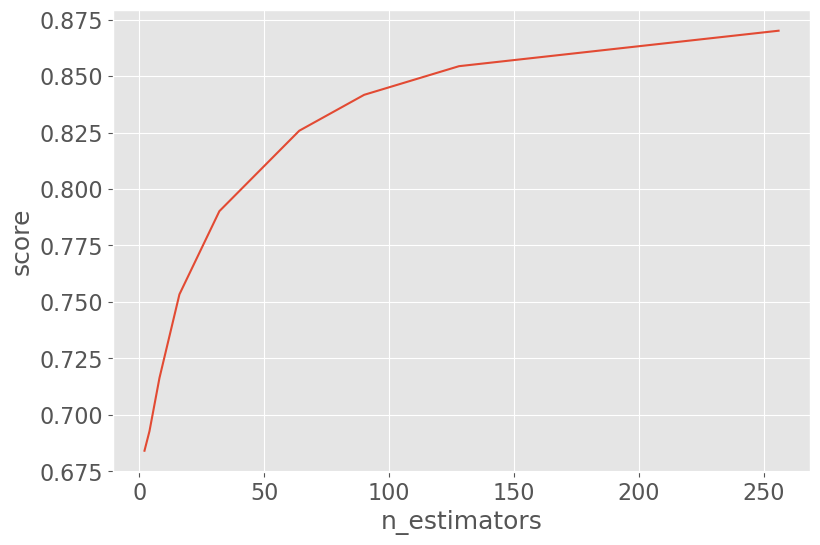

In [167]:
#XGBoosting using SVM(tf-idf)
import xgboost
from xgboost import XGBClassifier
estimator_range = [2,4,8,16,32,64, 90, 128, 256]

models = []
scores = []

for n_estimators in tqdm(estimator_range):

    # Create boosting classifier
    clf_Xgboost_tfidf = XGBClassifier(n_estimators=n_estimators)

    # Fit the model
    clf_Xgboost_tfidf.fit(X_train_vectors_tfidf_eknath, y_train_eknath)  #model

    # Append the model and score to their respective list
    models.append(clf_Xgboost_tfidf)
    scores.append(accuracy_score(y_true = y_val_eknath, y_pred = clf_Xgboost_tfidf.predict(X_val_vectors_tfidf_eknath)))

# Generate the plot of scores against number of estimators
plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.show()

In [168]:
#Xg boost with nestimators = 256
import xgboost
from xgboost import XGBClassifier
model_Xgboost = XGBClassifier(n_estimators=256)
model_Xgboost.fit(X_train_vectors_tfidf_eknath, y_train_eknath)
y_pred_XGBoost = model_Xgboost.predict(X_val_vectors_tfidf_eknath)
 
print("Accuracy is:",accuracy_score(y_val_eknath,y_pred_XGBoost))
print(classification_report(y_val_eknath,y_pred_XGBoost))
print('Confusion Matrix:',confusion_matrix(y_val_eknath,y_pred_XGBoost))

Accuracy is: 0.8700462683564675
              precision    recall  f1-score   support

           0       0.82      0.57      0.67       660
           1       0.83      0.96      0.89      2050
           2       0.93      0.88      0.90      2261

    accuracy                           0.87      4971
   macro avg       0.86      0.80      0.82      4971
weighted avg       0.87      0.87      0.87      4971

Confusion Matrix: [[ 376  192   92]
 [  20 1965   65]
 [  62  215 1984]]


In [169]:
#tf idf Decision Tree

from sklearn.tree import DecisionTreeClassifier
clf_DT = DecisionTreeClassifier()
# Train Decision Tree Classifier
clf_DT.fit(X_train_vectors_tfidf_eknath,y_train_eknath)
#Predict the response for test dataset
y_pred_DT = clf_DT.predict(X_val_vectors_tfidf_eknath)

print("Accuracy is:",accuracy_score(y_val_eknath,y_pred_DT))
print(classification_report(y_val_eknath,y_pred_DT))
print('Confusion Matrix:',confusion_matrix(y_val_eknath,y_pred_DT ))

Accuracy is: 0.7765037215851941
              precision    recall  f1-score   support

           0       0.59      0.47      0.52       660
           1       0.77      0.85      0.81      2050
           2       0.82      0.80      0.81      2261

    accuracy                           0.78      4971
   macro avg       0.73      0.71      0.71      4971
weighted avg       0.77      0.78      0.77      4971

Confusion Matrix: [[ 308  186  166]
 [  94 1737  219]
 [ 122  324 1815]]


In [117]:
!pip install tqdm

In [118]:
from tqdm import tqdm

100%|██████████| 9/9 [5:31:25<00:00, 2209.50s/it]


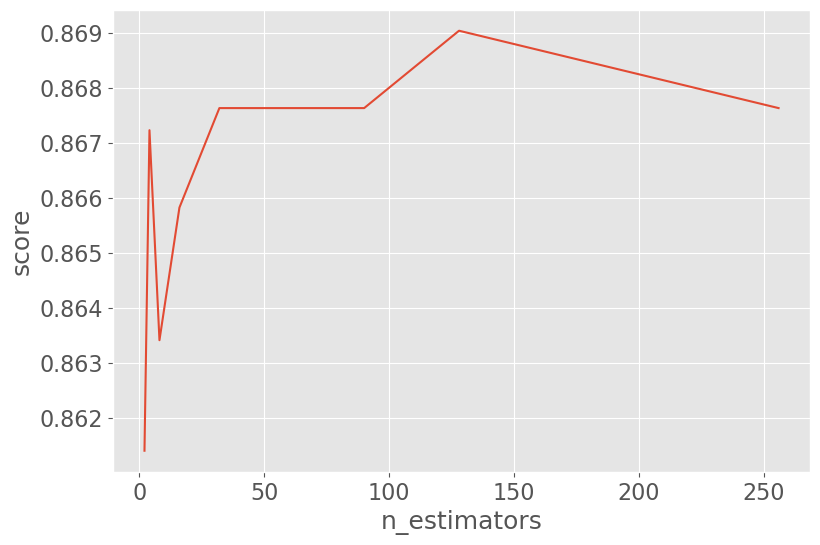

In [171]:
#FITTING THE CLASSIFICATION MODEL using SVM (Bagging) (tf-idf):

estimator_range = [2,4,8,16,32,64, 90, 128, 256]

models = []
scores = []

for n_estimators in tqdm(estimator_range):

    # Create bagging classifier
    clf_bagging_svm_tfidf = BaggingClassifier(base_estimator=svm_tfidf_eknath,n_estimators = n_estimators)

    # Fit the model
    clf_bagging_svm_tfidf.fit(X_train_vectors_tfidf_eknath, y_train_eknath)  #model

    # Append the model and score to their respective list
    models.append(clf_bagging_svm_tfidf)
    scores.append(accuracy_score(y_true = y_val_eknath, y_pred = clf_bagging_svm_tfidf.predict(X_val_vectors_tfidf_eknath)))

# Generate the plot of scores against number of estimators
plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.show()

In [172]:
#Best model using Bagging(SVM) (nestimators=128)(tf-idf):

#Creating bagging model
clf_bagging_svm_tfidf = BaggingClassifier(base_estimator=svm_tfidf_eknath,n_estimators = 128)

# Fit the model
clf_bagging_svm_tfidf.fit(X_train_vectors_tfidf_eknath, y_train_eknath)  #model

BaggingClassifier(base_estimator=SVC(kernel='linear', probability=True),
                  n_estimators=128)

In [173]:
print("Accuracy is:",accuracy_score(y_true = y_val_eknath, y_pred = clf_bagging_svm_tfidf.predict(X_val_vectors_tfidf_eknath)))
print(classification_report(y_val_eknath,clf_bagging_svm_tfidf.predict(X_val_vectors_tfidf_eknath)))
print('Confusion Matrix:',confusion_matrix(y_val_eknath, clf_bagging_svm_tfidf.predict(X_val_vectors_tfidf_eknath)))

Accuracy is: 0.8686381009857171
              precision    recall  f1-score   support

           0       0.77      0.67      0.71       660
           1       0.86      0.91      0.88      2050
           2       0.90      0.89      0.90      2261

    accuracy                           0.87      4971
   macro avg       0.84      0.82      0.83      4971
weighted avg       0.87      0.87      0.87      4971

Confusion Matrix: [[ 440  127   93]
 [  58 1858  134]
 [  74  167 2020]]


In [174]:
#w2v Decision Tree

from sklearn.tree import DecisionTreeClassifier
clf_DT_w2v = DecisionTreeClassifier()
# Train Decision Tree Classifier
clf_DT_w2v.fit(X_train_vectors_w2v_eknath,y_train_eknath)
#Predict the response for test dataset
y_pred_DT_w2v = clf_DT_w2v.predict(X_val_vectors_w2v_eknath)

print("Accuracy is:",accuracy_score(y_val_eknath,y_pred_DT_w2v))
print(classification_report(y_val_eknath,y_pred_DT_w2v))
print('Confusion Matrix:',confusion_matrix(y_val_eknath,y_pred_DT_w2v ))


Accuracy is: 0.6549989941661637
              precision    recall  f1-score   support

           0       0.32      0.33      0.32       660
           1       0.70      0.71      0.71      2050
           2       0.72      0.70      0.71      2261

    accuracy                           0.65      4971
   macro avg       0.58      0.58      0.58      4971
weighted avg       0.66      0.65      0.66      4971

Confusion Matrix: [[ 219  211  230]
 [ 202 1452  396]
 [ 271  405 1585]]


100%|██████████| 9/9 [00:53<00:00,  5.92s/it]


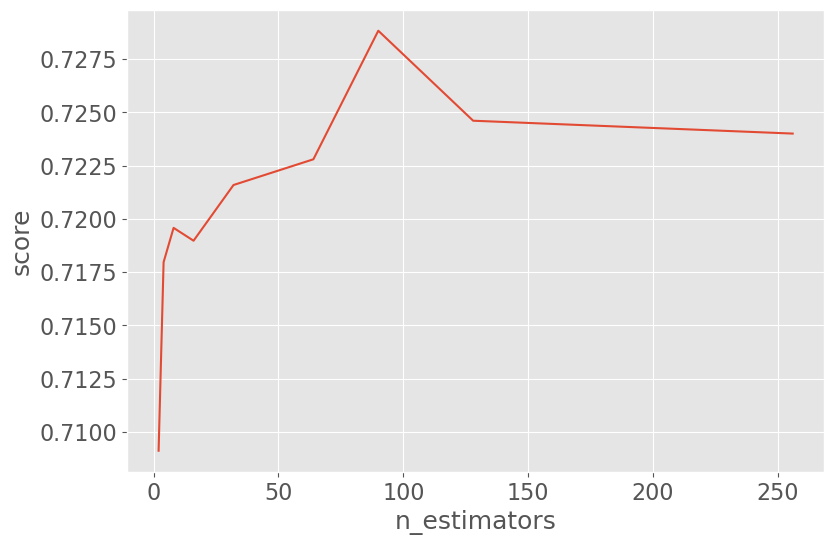

In [175]:
#XGBoosting using w2v
import xgboost
from xgboost import XGBClassifier
estimator_range = [2,4,8,16,32,64, 90, 128, 256]

models = []
scores = []

for n_estimators in tqdm(estimator_range):

    # Create boosting classifier
    clf_Xgboost_w2v = XGBClassifier(n_estimators=n_estimators)

    # Fit the model
    clf_Xgboost_w2v.fit(X_train_vectors_w2v_eknath, y_train_eknath)  #model

    # Append the model and score to their respective list
    models.append(clf_Xgboost_w2v)
    scores.append(accuracy_score(y_true = y_val_eknath, y_pred = clf_Xgboost_w2v.predict(X_val_vectors_w2v_eknath)))

# Generate the plot of scores against number of estimators
plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.show()

In [176]:
#Xg boost with nestimators = 90
import xgboost
from xgboost import XGBClassifier
model_Xgboost_w2v = XGBClassifier(n_estimators=90)
model_Xgboost_w2v.fit(X_train_vectors_w2v_eknath, y_train_eknath)
y_pred_XGBoost_w2v = model_Xgboost_w2v.predict(X_val_vectors_w2v_eknath)
 
print("Accuracy is:",accuracy_score(y_val_eknath,y_pred_XGBoost_w2v))
print(classification_report(y_val_eknath,y_pred_XGBoost_w2v))
print('Confusion Matrix:',confusion_matrix(y_val_eknath,y_pred_XGBoost_w2v))

Accuracy is: 0.7288271977469322
              precision    recall  f1-score   support

           0       0.43      0.24      0.31       660
           1       0.76      0.79      0.77      2050
           2       0.75      0.82      0.78      2261

    accuracy                           0.73      4971
   macro avg       0.65      0.61      0.62      4971
weighted avg       0.71      0.73      0.71      4971

Confusion Matrix: [[ 157  215  288]
 [  90 1622  338]
 [ 118  299 1844]]


100%|██████████| 9/9 [2:47:02<00:00, 1113.58s/it]


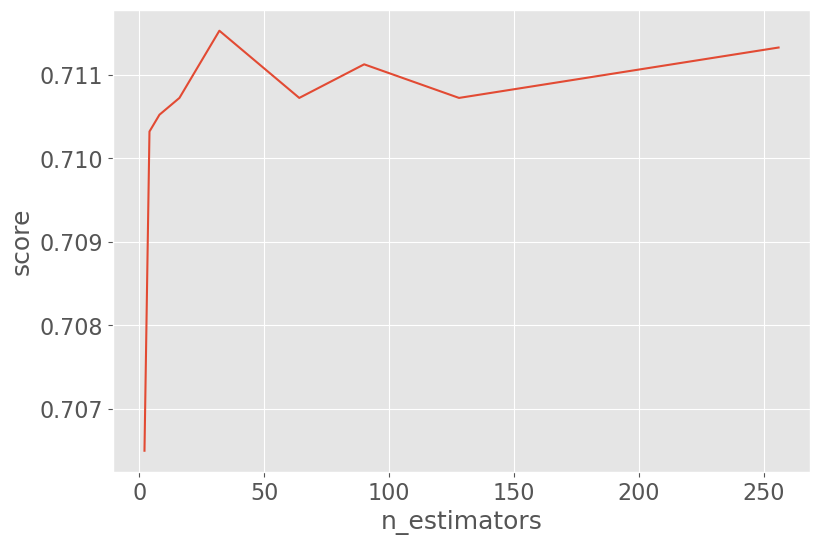

In [178]:
#FITTING THE CLASSIFICATION MODEL using SVM (Bagging) (w2v):

estimator_range = [2,4,8,16,32,64, 90, 128, 256]

models = []
scores = []

for n_estimators in tqdm(estimator_range):

    # Create bagging classifier
    clf_bagging_svm_w2v = BaggingClassifier(base_estimator=svm_w2v,n_estimators = n_estimators)

    # Fit the model
    clf_bagging_svm_w2v.fit(X_train_vectors_w2v_eknath, y_train_eknath)  #model

    # Append the model and score to their respective list
    models.append(clf_bagging_svm_w2v)
    scores.append(accuracy_score(y_true = y_val_eknath, y_pred = clf_bagging_svm_w2v.predict(X_val_vectors_w2v_eknath)))

# Generate the plot of scores against number of estimators
plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.show()

In [182]:
#Best model using Bagging(SVM) (nestimators=32)(w2v):

#Creating bagging model
clf_bagging_svm_w2v = BaggingClassifier(base_estimator=svm_w2v,n_estimators = 32)

# Fit the model
clf_bagging_svm_w2v.fit(X_train_vectors_w2v_eknath, y_train_eknath)  #model

print("Accuracy is:",accuracy_score(y_true = y_val_eknath, y_pred = clf_bagging_svm_w2v.predict(X_val_vectors_w2v_eknath)))
print(classification_report(y_val_eknath,clf_bagging_svm_w2v.predict(X_val_vectors_w2v_eknath)))
print('Confusion Matrix:',confusion_matrix(y_val_eknath, clf_bagging_svm_w2v.predict(X_val_vectors_w2v_eknath)))

Accuracy is: 0.7107221886944277
              precision    recall  f1-score   support

           0       0.32      0.02      0.04       660
           1       0.69      0.83      0.76      2050
           2       0.74      0.80      0.77      2261

    accuracy                           0.71      4971
   macro avg       0.58      0.55      0.52      4971
weighted avg       0.66      0.71      0.67      4971

Confusion Matrix: [[  14  330  316]
 [   9 1702  339]
 [  21  423 1817]]
